# Set Parameter
- Attention = Luong
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = [2, 50, 4]
- Epochs = 100
- N = 100
- Data = 10K
- Deduplication & Random Split

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

# Data load

In [3]:
train_path = "data/bracket_rand/N100/data_train.txt"
dev_path = "data/bracket_rand/N100/data_test.txt"

# Prepare dataset

In [4]:
src = fields.SourceField()
tgt = fields.TargetField()
max_len = 104
def len_filter(example):
    return len(example.src) <= max_len and len(example.tgt) <= max_len
train = torchtext.data.TabularDataset(
    path=train_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
dev = torchtext.data.TabularDataset(
    path=dev_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
src.build_vocab(train)
tgt.build_vocab(train)
input_vocab = src.vocab
output_vocab = tgt.vocab

# Prepare loss

In [5]:
weight = torch.ones(len(tgt.vocab))
pad = tgt.vocab.stoi[tgt.pad_token]
loss = Perplexity(weight, pad)
if torch.cuda.is_available():
    loss.cuda()

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


# Variable definition

In [6]:
optimizer = "Adam"
hidden_sizes = list(range(2, 51, 4))
character_error_rate = []
sentance_error_rate = []
bidirectional = True
print(hidden_sizes)

[2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50]


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-02-27 11:19:56,522 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None


hidden size is : 2


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-02-27 11:20:53,418 INFO   Finished epoch 1: Train loss: 33.8840, Dev loss: 24.4351, Accuracy(Character): 0.0704, Accuracy(Word): 0.0000
2019-02-27 11:21:50,225 INFO   Finished epoch 2: Train loss: 21.7157, Dev loss: 21.1016, Accuracy(Character): 0.0730, Accuracy(Word): 0.0000
2019-02-27 11:22:46,059 INFO   Finished epoch 3: Train loss: 20.2787, Dev loss: 20.5533, Accuracy(Character): 0.0752, Accuracy(Word): 0.0000
2019-02-27 11:23:43,880 INFO   Finished epoch 4: Train loss: 19.4647, Dev loss: 20.4731, Accuracy(Character): 0.0758, Accuracy(Word): 0.0000
2019-02-27 11:24:43,630 INFO   Finished epoch 5: Train loss: 18.8236, Dev loss: 20.7200, Accuracy(Character): 0.0752, Accuracy(Word): 0.0000
2019-02-27 11:25:41,828 INFO   Finished epoch 6: Train loss: 1

2019-02-27 12:17:39,267 INFO   Finished epoch 58: Train loss: 15.7422, Dev loss: 22.9922, Accuracy(Character): 0.1247, Accuracy(Word): 0.0000
2019-02-27 12:19:10,148 INFO   Finished epoch 59: Train loss: 13.0012, Dev loss: 19.8811, Accuracy(Character): 0.1296, Accuracy(Word): 0.0000
2019-02-27 12:20:43,022 INFO   Finished epoch 60: Train loss: 13.9263, Dev loss: 20.8110, Accuracy(Character): 0.1249, Accuracy(Word): 0.0000
2019-02-27 12:22:13,707 INFO   Finished epoch 61: Train loss: 12.9100, Dev loss: 21.1986, Accuracy(Character): 0.1210, Accuracy(Word): 0.0000
2019-02-27 12:23:44,943 INFO   Finished epoch 62: Train loss: 11.8848, Dev loss: 21.4363, Accuracy(Character): 0.1223, Accuracy(Word): 0.0000
2019-02-27 12:25:14,632 INFO   Finished epoch 63: Train loss: 13.2356, Dev loss: 23.9552, Accuracy(Character): 0.1224, Accuracy(Word): 0.0000
2019-02-27 12:26:48,247 INFO   Finished epoch 64: Train loss: 13.6440, Dev loss: 22.9583, Accuracy(Character): 0.1163, Accuracy(Word): 0.0000
2019-0

hidden size is : 6


2019-02-27 13:23:48,409 INFO   Finished epoch 1: Train loss: 28.4042, Dev loss: 20.6105, Accuracy(Character): 0.0730, Accuracy(Word): 0.0000
2019-02-27 13:25:21,121 INFO   Finished epoch 2: Train loss: 19.9315, Dev loss: 20.2248, Accuracy(Character): 0.0730, Accuracy(Word): 0.0000
2019-02-27 13:26:52,242 INFO   Finished epoch 3: Train loss: 19.7000, Dev loss: 20.1087, Accuracy(Character): 0.0730, Accuracy(Word): 0.0000
2019-02-27 13:28:26,329 INFO   Finished epoch 4: Train loss: 19.6349, Dev loss: 20.1075, Accuracy(Character): 0.0752, Accuracy(Word): 0.0000
2019-02-27 13:29:59,045 INFO   Finished epoch 5: Train loss: 19.6055, Dev loss: 20.0375, Accuracy(Character): 0.0750, Accuracy(Word): 0.0000
2019-02-27 13:31:37,130 INFO   Finished epoch 6: Train loss: 19.4766, Dev loss: 19.8077, Accuracy(Character): 0.0890, Accuracy(Word): 0.0000
2019-02-27 13:33:11,757 INFO   Finished epoch 7: Train loss: 18.9337, Dev loss: 19.3077, Accuracy(Character): 0.0882, Accuracy(Word): 0.0000
2019-02-27 13

2019-02-27 14:52:46,399 INFO   Finished epoch 59: Train loss: 25.7711, Dev loss: 34.0832, Accuracy(Character): 0.1571, Accuracy(Word): 0.0098
2019-02-27 14:54:08,776 INFO   Finished epoch 60: Train loss: 17.9563, Dev loss: 21.7645, Accuracy(Character): 0.1743, Accuracy(Word): 0.0086
2019-02-27 14:55:29,189 INFO   Finished epoch 61: Train loss: 14.9787, Dev loss: 21.2018, Accuracy(Character): 0.1762, Accuracy(Word): 0.0088
2019-02-27 14:56:58,005 INFO   Finished epoch 62: Train loss: 11.8868, Dev loss: 18.2074, Accuracy(Character): 0.1734, Accuracy(Word): 0.0118
2019-02-27 14:58:24,900 INFO   Finished epoch 63: Train loss: 16.3364, Dev loss: 36.2906, Accuracy(Character): 0.1633, Accuracy(Word): 0.0098
2019-02-27 14:59:50,897 INFO   Finished epoch 64: Train loss: 18.7628, Dev loss: 35.2926, Accuracy(Character): 0.1491, Accuracy(Word): 0.0130
2019-02-27 15:01:13,912 INFO   Finished epoch 65: Train loss: 13.7983, Dev loss: 17.4910, Accuracy(Character): 0.1707, Accuracy(Word): 0.0140
2019-0

hidden size is : 10


2019-02-27 15:57:29,623 INFO   Finished epoch 1: Train loss: 26.7024, Dev loss: 20.2632, Accuracy(Character): 0.0792, Accuracy(Word): 0.0000
2019-02-27 15:59:04,556 INFO   Finished epoch 2: Train loss: 19.7106, Dev loss: 19.9656, Accuracy(Character): 0.1007, Accuracy(Word): 0.0000
2019-02-27 16:00:38,267 INFO   Finished epoch 3: Train loss: 19.0046, Dev loss: 19.0661, Accuracy(Character): 0.0872, Accuracy(Word): 0.0000
2019-02-27 16:02:15,428 INFO   Finished epoch 4: Train loss: 17.7551, Dev loss: 18.4525, Accuracy(Character): 0.0969, Accuracy(Word): 0.0000
2019-02-27 16:03:48,088 INFO   Finished epoch 5: Train loss: 17.0354, Dev loss: 18.7050, Accuracy(Character): 0.0877, Accuracy(Word): 0.0000
2019-02-27 16:05:25,818 INFO   Finished epoch 6: Train loss: 16.2248, Dev loss: 20.1508, Accuracy(Character): 0.0829, Accuracy(Word): 0.0000
2019-02-27 16:07:02,028 INFO   Finished epoch 7: Train loss: 15.5913, Dev loss: 20.2124, Accuracy(Character): 0.0877, Accuracy(Word): 0.0000
2019-02-27 16

2019-02-27 17:30:21,207 INFO   Finished epoch 59: Train loss: 18.6876, Dev loss: 32.4194, Accuracy(Character): 0.2673, Accuracy(Word): 0.0224
2019-02-27 17:31:59,114 INFO   Finished epoch 60: Train loss: 21.1322, Dev loss: 12.6452, Accuracy(Character): 0.2924, Accuracy(Word): 0.0288
2019-02-27 17:33:32,685 INFO   Finished epoch 61: Train loss: 10.8084, Dev loss: 11.5422, Accuracy(Character): 0.2996, Accuracy(Word): 0.0170
2019-02-27 17:35:03,777 INFO   Finished epoch 62: Train loss: 9.6445, Dev loss: 13.3696, Accuracy(Character): 0.3021, Accuracy(Word): 0.0238
2019-02-27 17:36:37,803 INFO   Finished epoch 63: Train loss: 8.8782, Dev loss: 12.2727, Accuracy(Character): 0.2939, Accuracy(Word): 0.0192
2019-02-27 17:38:13,407 INFO   Finished epoch 64: Train loss: 7.9692, Dev loss: 12.1333, Accuracy(Character): 0.2989, Accuracy(Word): 0.0278
2019-02-27 17:39:47,036 INFO   Finished epoch 65: Train loss: 8.3306, Dev loss: 9.1648, Accuracy(Character): 0.3276, Accuracy(Word): 0.0172
2019-02-27 

hidden size is : 14


2019-02-27 18:35:40,049 INFO   Finished epoch 1: Train loss: 25.3365, Dev loss: 19.9176, Accuracy(Character): 0.0921, Accuracy(Word): 0.0000
2019-02-27 18:37:13,692 INFO   Finished epoch 2: Train loss: 18.2250, Dev loss: 18.4653, Accuracy(Character): 0.0939, Accuracy(Word): 0.0000
2019-02-27 18:38:47,545 INFO   Finished epoch 3: Train loss: 17.0857, Dev loss: 17.9990, Accuracy(Character): 0.0882, Accuracy(Word): 0.0000
2019-02-27 18:40:18,297 INFO   Finished epoch 4: Train loss: 16.7123, Dev loss: 23.0594, Accuracy(Character): 0.0797, Accuracy(Word): 0.0000
2019-02-27 18:41:50,530 INFO   Finished epoch 5: Train loss: 16.7297, Dev loss: 30.0602, Accuracy(Character): 0.0805, Accuracy(Word): 0.0000
2019-02-27 18:43:23,087 INFO   Finished epoch 6: Train loss: 15.8551, Dev loss: 38.3851, Accuracy(Character): 0.0816, Accuracy(Word): 0.0000
2019-02-27 18:44:55,060 INFO   Finished epoch 7: Train loss: 16.8666, Dev loss: 18.4682, Accuracy(Character): 0.1051, Accuracy(Word): 0.0000
2019-02-27 18

2019-02-27 20:06:27,278 INFO   Finished epoch 60: Train loss: 2.8896, Dev loss: 4.5816, Accuracy(Character): 0.4413, Accuracy(Word): 0.0744
2019-02-27 20:07:57,216 INFO   Finished epoch 61: Train loss: 2.8421, Dev loss: 4.1722, Accuracy(Character): 0.4547, Accuracy(Word): 0.0752
2019-02-27 20:09:26,246 INFO   Finished epoch 62: Train loss: 2.8353, Dev loss: 4.3940, Accuracy(Character): 0.4293, Accuracy(Word): 0.0608
2019-02-27 20:10:59,824 INFO   Finished epoch 63: Train loss: 2.9932, Dev loss: 4.5016, Accuracy(Character): 0.4484, Accuracy(Word): 0.0444
2019-02-27 20:12:29,990 INFO   Finished epoch 64: Train loss: 2.9420, Dev loss: 3.9960, Accuracy(Character): 0.4621, Accuracy(Word): 0.0758
2019-02-27 20:13:55,272 INFO   Finished epoch 65: Train loss: 2.9784, Dev loss: 3.7421, Accuracy(Character): 0.4787, Accuracy(Word): 0.0670
2019-02-27 20:15:15,363 INFO   Finished epoch 66: Train loss: 2.7944, Dev loss: 4.3932, Accuracy(Character): 0.4488, Accuracy(Word): 0.0812
2019-02-27 20:16:35,

hidden size is : 18


2019-02-27 20:59:18,467 INFO   Finished epoch 1: Train loss: 24.3597, Dev loss: 20.0257, Accuracy(Character): 0.1023, Accuracy(Word): 0.0000
2019-02-27 21:00:32,817 INFO   Finished epoch 2: Train loss: 18.6363, Dev loss: 18.4903, Accuracy(Character): 0.0963, Accuracy(Word): 0.0000
2019-02-27 21:01:50,331 INFO   Finished epoch 3: Train loss: 17.1306, Dev loss: 17.9041, Accuracy(Character): 0.0966, Accuracy(Word): 0.0000
2019-02-27 21:02:57,508 INFO   Finished epoch 4: Train loss: 16.4839, Dev loss: 24.0796, Accuracy(Character): 0.0891, Accuracy(Word): 0.0000
2019-02-27 21:04:09,345 INFO   Finished epoch 5: Train loss: 15.9816, Dev loss: 23.1821, Accuracy(Character): 0.0875, Accuracy(Word): 0.0000
2019-02-27 21:05:28,707 INFO   Finished epoch 6: Train loss: 14.7000, Dev loss: 18.0927, Accuracy(Character): 0.1004, Accuracy(Word): 0.0000
2019-02-27 21:06:37,070 INFO   Finished epoch 7: Train loss: 13.3421, Dev loss: 23.8816, Accuracy(Character): 0.1073, Accuracy(Word): 0.0000
2019-02-27 21

2019-02-27 22:07:01,125 INFO   Finished epoch 60: Train loss: 2.7023, Dev loss: 3.6334, Accuracy(Character): 0.4991, Accuracy(Word): 0.0828
2019-02-27 22:07:58,664 INFO   Finished epoch 61: Train loss: 2.7197, Dev loss: 3.8192, Accuracy(Character): 0.4899, Accuracy(Word): 0.0578
2019-02-27 22:08:54,723 INFO   Finished epoch 62: Train loss: 2.5488, Dev loss: 3.8303, Accuracy(Character): 0.4913, Accuracy(Word): 0.0888
2019-02-27 22:09:50,792 INFO   Finished epoch 63: Train loss: 2.7162, Dev loss: 3.8631, Accuracy(Character): 0.5048, Accuracy(Word): 0.0910
2019-02-27 22:10:47,819 INFO   Finished epoch 64: Train loss: 2.5385, Dev loss: 3.9922, Accuracy(Character): 0.4831, Accuracy(Word): 0.0846
2019-02-27 22:11:45,108 INFO   Finished epoch 65: Train loss: 3.0082, Dev loss: 3.5246, Accuracy(Character): 0.5174, Accuracy(Word): 0.0960
2019-02-27 22:12:41,737 INFO   Finished epoch 66: Train loss: 2.5638, Dev loss: 4.0289, Accuracy(Character): 0.4763, Accuracy(Word): 0.0672
2019-02-27 22:13:39,

hidden size is : 22


2019-02-27 22:46:25,345 INFO   Finished epoch 1: Train loss: 23.7921, Dev loss: 19.5240, Accuracy(Character): 0.0945, Accuracy(Word): 0.0000
2019-02-27 22:47:24,374 INFO   Finished epoch 2: Train loss: 17.7442, Dev loss: 18.0993, Accuracy(Character): 0.0918, Accuracy(Word): 0.0000
2019-02-27 22:48:29,351 INFO   Finished epoch 3: Train loss: 16.5207, Dev loss: 17.2307, Accuracy(Character): 0.1008, Accuracy(Word): 0.0000
2019-02-27 22:49:21,037 INFO   Finished epoch 4: Train loss: 15.7549, Dev loss: 17.5137, Accuracy(Character): 0.0971, Accuracy(Word): 0.0000
2019-02-27 22:50:20,428 INFO   Finished epoch 5: Train loss: 14.3092, Dev loss: 16.1229, Accuracy(Character): 0.1208, Accuracy(Word): 0.0000
2019-02-27 22:51:15,406 INFO   Finished epoch 6: Train loss: 13.9320, Dev loss: 16.9550, Accuracy(Character): 0.1266, Accuracy(Word): 0.0000
2019-02-27 22:52:15,703 INFO   Finished epoch 7: Train loss: 13.4960, Dev loss: 40.2472, Accuracy(Character): 0.0913, Accuracy(Word): 0.0000
2019-02-27 22

2019-02-27 23:52:05,465 INFO   Finished epoch 60: Train loss: 2.3579, Dev loss: 3.2594, Accuracy(Character): 0.5450, Accuracy(Word): 0.0708
2019-02-27 23:53:16,632 INFO   Finished epoch 61: Train loss: 2.2605, Dev loss: 3.3980, Accuracy(Character): 0.5414, Accuracy(Word): 0.0618
2019-02-27 23:54:26,376 INFO   Finished epoch 62: Train loss: 2.3331, Dev loss: 3.1289, Accuracy(Character): 0.5493, Accuracy(Word): 0.1104
2019-02-27 23:55:38,575 INFO   Finished epoch 63: Train loss: 2.3051, Dev loss: 3.6465, Accuracy(Character): 0.5070, Accuracy(Word): 0.1232
2019-02-27 23:56:50,202 INFO   Finished epoch 64: Train loss: 2.2138, Dev loss: 3.9946, Accuracy(Character): 0.4979, Accuracy(Word): 0.0860
2019-02-27 23:58:03,005 INFO   Finished epoch 65: Train loss: 2.2961, Dev loss: 3.4225, Accuracy(Character): 0.5256, Accuracy(Word): 0.0868
2019-02-27 23:59:13,650 INFO   Finished epoch 66: Train loss: 2.2112, Dev loss: 3.5722, Accuracy(Character): 0.5084, Accuracy(Word): 0.1188
2019-02-28 00:00:34,

hidden size is : 26


2019-02-28 00:50:00,669 INFO   Finished epoch 1: Train loss: 23.0554, Dev loss: 19.0234, Accuracy(Character): 0.0871, Accuracy(Word): 0.0000
2019-02-28 00:51:41,863 INFO   Finished epoch 2: Train loss: 17.3893, Dev loss: 18.2107, Accuracy(Character): 0.0889, Accuracy(Word): 0.0000
2019-02-28 00:53:25,420 INFO   Finished epoch 3: Train loss: 16.2841, Dev loss: 17.3893, Accuracy(Character): 0.0980, Accuracy(Word): 0.0000
2019-02-28 00:55:10,058 INFO   Finished epoch 4: Train loss: 15.9862, Dev loss: 17.0421, Accuracy(Character): 0.1131, Accuracy(Word): 0.0000
2019-02-28 00:56:51,198 INFO   Finished epoch 5: Train loss: 14.7492, Dev loss: 32.3545, Accuracy(Character): 0.0756, Accuracy(Word): 0.0000
2019-02-28 00:58:37,773 INFO   Finished epoch 6: Train loss: 13.2694, Dev loss: 16.3647, Accuracy(Character): 0.1320, Accuracy(Word): 0.0000
2019-02-28 01:00:21,429 INFO   Finished epoch 7: Train loss: 13.7274, Dev loss: 21.1462, Accuracy(Character): 0.1173, Accuracy(Word): 0.0000
2019-02-28 01

2019-02-28 02:30:58,057 INFO   Finished epoch 60: Train loss: 2.1319, Dev loss: 2.5625, Accuracy(Character): 0.6260, Accuracy(Word): 0.1746
2019-02-28 02:32:37,136 INFO   Finished epoch 61: Train loss: 2.0047, Dev loss: 2.8889, Accuracy(Character): 0.5863, Accuracy(Word): 0.1644
2019-02-28 02:34:16,752 INFO   Finished epoch 62: Train loss: 1.9951, Dev loss: 2.5156, Accuracy(Character): 0.6373, Accuracy(Word): 0.1832
2019-02-28 02:36:02,641 INFO   Finished epoch 63: Train loss: 2.0497, Dev loss: 2.3727, Accuracy(Character): 0.6465, Accuracy(Word): 0.1802
2019-02-28 02:37:45,421 INFO   Finished epoch 64: Train loss: 1.9360, Dev loss: 2.4796, Accuracy(Character): 0.6256, Accuracy(Word): 0.1698
2019-02-28 02:39:25,794 INFO   Finished epoch 65: Train loss: 1.9648, Dev loss: 2.4853, Accuracy(Character): 0.6307, Accuracy(Word): 0.1686
2019-02-28 02:41:10,984 INFO   Finished epoch 66: Train loss: 1.9777, Dev loss: 2.4034, Accuracy(Character): 0.6504, Accuracy(Word): 0.1740
2019-02-28 02:42:52,

hidden size is : 30


2019-02-28 03:38:42,014 INFO   Finished epoch 1: Train loss: 22.4947, Dev loss: 18.6165, Accuracy(Character): 0.0996, Accuracy(Word): 0.0000
2019-02-28 03:40:06,823 INFO   Finished epoch 2: Train loss: 16.8398, Dev loss: 17.6518, Accuracy(Character): 0.1043, Accuracy(Word): 0.0000
2019-02-28 03:41:37,504 INFO   Finished epoch 3: Train loss: 15.4463, Dev loss: 17.9767, Accuracy(Character): 0.1008, Accuracy(Word): 0.0000
2019-02-28 03:43:09,503 INFO   Finished epoch 4: Train loss: 14.1016, Dev loss: 20.4980, Accuracy(Character): 0.0918, Accuracy(Word): 0.0000
2019-02-28 03:44:38,098 INFO   Finished epoch 5: Train loss: 13.5023, Dev loss: 18.2683, Accuracy(Character): 0.1180, Accuracy(Word): 0.0000
2019-02-28 03:46:08,514 INFO   Finished epoch 6: Train loss: 12.3678, Dev loss: 18.1604, Accuracy(Character): 0.1290, Accuracy(Word): 0.0000
2019-02-28 03:47:41,099 INFO   Finished epoch 7: Train loss: 14.1637, Dev loss: 16.7812, Accuracy(Character): 0.1412, Accuracy(Word): 0.0000
2019-02-28 03

2019-02-28 04:44:34,512 INFO   Finished epoch 60: Train loss: 2.3886, Dev loss: 3.4855, Accuracy(Character): 0.5374, Accuracy(Word): 0.1422
2019-02-28 04:45:33,080 INFO   Finished epoch 61: Train loss: 2.3767, Dev loss: 3.4476, Accuracy(Character): 0.5584, Accuracy(Word): 0.1532
2019-02-28 04:46:29,763 INFO   Finished epoch 62: Train loss: 2.2588, Dev loss: 3.5554, Accuracy(Character): 0.5408, Accuracy(Word): 0.1636
2019-02-28 04:47:31,232 INFO   Finished epoch 63: Train loss: 2.2340, Dev loss: 2.9358, Accuracy(Character): 0.5681, Accuracy(Word): 0.1474
2019-02-28 04:48:32,763 INFO   Finished epoch 64: Train loss: 2.2055, Dev loss: 3.2107, Accuracy(Character): 0.5753, Accuracy(Word): 0.1616
2019-02-28 04:49:28,475 INFO   Finished epoch 65: Train loss: 1.8874, Dev loss: 3.7892, Accuracy(Character): 0.5349, Accuracy(Word): 0.1446
2019-02-28 04:50:26,092 INFO   Finished epoch 66: Train loss: 2.2438, Dev loss: 2.8993, Accuracy(Character): 0.5693, Accuracy(Word): 0.1550
2019-02-28 04:51:22,

hidden size is : 34


2019-02-28 05:23:56,835 INFO   Finished epoch 1: Train loss: 22.1437, Dev loss: 18.2656, Accuracy(Character): 0.0918, Accuracy(Word): 0.0000
2019-02-28 05:24:54,148 INFO   Finished epoch 2: Train loss: 16.4865, Dev loss: 17.0162, Accuracy(Character): 0.1112, Accuracy(Word): 0.0000
2019-02-28 05:25:52,488 INFO   Finished epoch 3: Train loss: 15.8438, Dev loss: 27.0239, Accuracy(Character): 0.0972, Accuracy(Word): 0.0000
2019-02-28 05:26:47,739 INFO   Finished epoch 4: Train loss: 14.9113, Dev loss: 17.7894, Accuracy(Character): 0.1154, Accuracy(Word): 0.0000
2019-02-28 05:27:42,641 INFO   Finished epoch 5: Train loss: 14.6779, Dev loss: 22.9982, Accuracy(Character): 0.1165, Accuracy(Word): 0.0000
2019-02-28 05:28:42,692 INFO   Finished epoch 6: Train loss: 18.9648, Dev loss: 21.7825, Accuracy(Character): 0.1223, Accuracy(Word): 0.0000
2019-02-28 05:29:39,207 INFO   Finished epoch 7: Train loss: 16.0512, Dev loss: 20.0661, Accuracy(Character): 0.1270, Accuracy(Word): 0.0000
2019-02-28 05

2019-02-28 06:20:37,631 INFO   Finished epoch 60: Train loss: 1.8393, Dev loss: 2.4427, Accuracy(Character): 0.6668, Accuracy(Word): 0.1920
2019-02-28 06:21:35,097 INFO   Finished epoch 61: Train loss: 1.9731, Dev loss: 3.0333, Accuracy(Character): 0.6062, Accuracy(Word): 0.1832
2019-02-28 06:22:34,480 INFO   Finished epoch 62: Train loss: 1.9746, Dev loss: 2.5524, Accuracy(Character): 0.6389, Accuracy(Word): 0.1672
2019-02-28 06:23:33,586 INFO   Finished epoch 63: Train loss: 1.8322, Dev loss: 2.2201, Accuracy(Character): 0.6791, Accuracy(Word): 0.1698
2019-02-28 06:24:32,017 INFO   Finished epoch 64: Train loss: 1.7243, Dev loss: 2.1936, Accuracy(Character): 0.6900, Accuracy(Word): 0.1940
2019-02-28 06:25:29,195 INFO   Finished epoch 65: Train loss: 1.7792, Dev loss: 3.1227, Accuracy(Character): 0.6320, Accuracy(Word): 0.1872
2019-02-28 06:26:25,234 INFO   Finished epoch 66: Train loss: 1.8334, Dev loss: 2.2016, Accuracy(Character): 0.6900, Accuracy(Word): 0.1970
2019-02-28 06:27:25,

hidden size is : 38


2019-02-28 06:59:55,116 INFO   Finished epoch 1: Train loss: 21.4938, Dev loss: 18.1406, Accuracy(Character): 0.0885, Accuracy(Word): 0.0000
2019-02-28 07:00:52,656 INFO   Finished epoch 2: Train loss: 16.7384, Dev loss: 17.0180, Accuracy(Character): 0.1104, Accuracy(Word): 0.0000
2019-02-28 07:01:50,376 INFO   Finished epoch 3: Train loss: 15.3166, Dev loss: 16.3453, Accuracy(Character): 0.1131, Accuracy(Word): 0.0000
2019-02-28 07:02:47,116 INFO   Finished epoch 4: Train loss: 13.9124, Dev loss: 16.7049, Accuracy(Character): 0.1210, Accuracy(Word): 0.0000
2019-02-28 07:03:46,919 INFO   Finished epoch 5: Train loss: 13.4405, Dev loss: 16.2632, Accuracy(Character): 0.1313, Accuracy(Word): 0.0000
2019-02-28 07:04:45,947 INFO   Finished epoch 6: Train loss: 13.7765, Dev loss: 15.8258, Accuracy(Character): 0.1637, Accuracy(Word): 0.0022
2019-02-28 07:05:43,248 INFO   Finished epoch 7: Train loss: 12.3468, Dev loss: 12.8372, Accuracy(Character): 0.2333, Accuracy(Word): 0.0032
2019-02-28 07

2019-02-28 07:40:30,464 INFO   Finished epoch 60: Train loss: 2.0927, Dev loss: 2.7361, Accuracy(Character): 0.5897, Accuracy(Word): 0.1452
2019-02-28 07:41:07,249 INFO   Finished epoch 61: Train loss: 2.2414, Dev loss: 2.6155, Accuracy(Character): 0.5943, Accuracy(Word): 0.1392
2019-02-28 07:41:44,263 INFO   Finished epoch 62: Train loss: 2.0946, Dev loss: 2.6632, Accuracy(Character): 0.6013, Accuracy(Word): 0.1556
2019-02-28 07:42:19,371 INFO   Finished epoch 63: Train loss: 2.1176, Dev loss: 2.5126, Accuracy(Character): 0.6177, Accuracy(Word): 0.1408
2019-02-28 07:42:56,610 INFO   Finished epoch 64: Train loss: 2.0410, Dev loss: 2.4963, Accuracy(Character): 0.6127, Accuracy(Word): 0.1260
2019-02-28 07:43:34,067 INFO   Finished epoch 65: Train loss: 2.0233, Dev loss: 2.3468, Accuracy(Character): 0.6447, Accuracy(Word): 0.1558
2019-02-28 07:44:21,782 INFO   Finished epoch 66: Train loss: 1.9432, Dev loss: 2.3168, Accuracy(Character): 0.6611, Accuracy(Word): 0.1648
2019-02-28 07:45:40,

hidden size is : 42


2019-02-28 08:35:15,031 INFO   Finished epoch 1: Train loss: 21.5130, Dev loss: 17.8629, Accuracy(Character): 0.0907, Accuracy(Word): 0.0000
2019-02-28 08:36:42,581 INFO   Finished epoch 2: Train loss: 16.2868, Dev loss: 17.0212, Accuracy(Character): 0.1002, Accuracy(Word): 0.0000
2019-02-28 08:38:10,872 INFO   Finished epoch 3: Train loss: 16.1436, Dev loss: 16.9946, Accuracy(Character): 0.1058, Accuracy(Word): 0.0000
2019-02-28 08:39:37,159 INFO   Finished epoch 4: Train loss: 14.1413, Dev loss: 17.3865, Accuracy(Character): 0.1279, Accuracy(Word): 0.0000
2019-02-28 08:41:03,973 INFO   Finished epoch 5: Train loss: 14.4471, Dev loss: 22.1458, Accuracy(Character): 0.1240, Accuracy(Word): 0.0000
2019-02-28 08:42:32,139 INFO   Finished epoch 6: Train loss: 18.3600, Dev loss: 18.6167, Accuracy(Character): 0.1731, Accuracy(Word): 0.0046
2019-02-28 08:43:58,399 INFO   Finished epoch 7: Train loss: 20.1520, Dev loss: 16.3849, Accuracy(Character): 0.2223, Accuracy(Word): 0.0022
2019-02-28 08

2019-02-28 10:01:12,747 INFO   Finished epoch 60: Train loss: 2.0062, Dev loss: 2.6201, Accuracy(Character): 0.6279, Accuracy(Word): 0.1516
2019-02-28 10:02:42,958 INFO   Finished epoch 61: Train loss: 1.9685, Dev loss: 2.4196, Accuracy(Character): 0.6321, Accuracy(Word): 0.1726
2019-02-28 10:04:11,953 INFO   Finished epoch 62: Train loss: 2.0254, Dev loss: 2.4662, Accuracy(Character): 0.6213, Accuracy(Word): 0.1838
2019-02-28 10:05:36,256 INFO   Finished epoch 63: Train loss: 2.0537, Dev loss: 2.5165, Accuracy(Character): 0.6491, Accuracy(Word): 0.1962
2019-02-28 10:07:03,605 INFO   Finished epoch 64: Train loss: 1.9033, Dev loss: 2.4071, Accuracy(Character): 0.6586, Accuracy(Word): 0.1904
2019-02-28 10:08:31,453 INFO   Finished epoch 65: Train loss: 1.9006, Dev loss: 2.4323, Accuracy(Character): 0.6492, Accuracy(Word): 0.1914
2019-02-28 10:10:01,406 INFO   Finished epoch 66: Train loss: 1.9045, Dev loss: 2.2621, Accuracy(Character): 0.6528, Accuracy(Word): 0.1906
2019-02-28 10:11:29,

hidden size is : 46


2019-02-28 10:59:50,608 INFO   Finished epoch 1: Train loss: 20.7728, Dev loss: 17.4968, Accuracy(Character): 0.0912, Accuracy(Word): 0.0000
2019-02-28 11:01:17,323 INFO   Finished epoch 2: Train loss: 15.7455, Dev loss: 16.5321, Accuracy(Character): 0.1117, Accuracy(Word): 0.0000
2019-02-28 11:02:44,481 INFO   Finished epoch 3: Train loss: 14.8111, Dev loss: 17.0924, Accuracy(Character): 0.1126, Accuracy(Word): 0.0000
2019-02-28 11:04:13,187 INFO   Finished epoch 4: Train loss: 14.9537, Dev loss: 21.1779, Accuracy(Character): 0.1176, Accuracy(Word): 0.0000
2019-02-28 11:05:37,914 INFO   Finished epoch 5: Train loss: 15.1034, Dev loss: 15.5989, Accuracy(Character): 0.2101, Accuracy(Word): 0.0032
2019-02-28 11:07:07,624 INFO   Finished epoch 6: Train loss: 9.6646, Dev loss: 15.5714, Accuracy(Character): 0.2014, Accuracy(Word): 0.0022
2019-02-28 11:08:37,127 INFO   Finished epoch 7: Train loss: 9.0133, Dev loss: 11.6864, Accuracy(Character): 0.2333, Accuracy(Word): 0.0032
2019-02-28 11:1

2019-02-28 12:24:11,861 INFO   Finished epoch 60: Train loss: 1.6870, Dev loss: 1.9519, Accuracy(Character): 0.7344, Accuracy(Word): 0.1980
2019-02-28 12:25:34,772 INFO   Finished epoch 61: Train loss: 1.6024, Dev loss: 2.2744, Accuracy(Character): 0.6871, Accuracy(Word): 0.2020
2019-02-28 12:27:02,610 INFO   Finished epoch 62: Train loss: 1.6448, Dev loss: 2.5912, Accuracy(Character): 0.6856, Accuracy(Word): 0.2012
2019-02-28 12:28:31,641 INFO   Finished epoch 63: Train loss: 1.6734, Dev loss: 1.9529, Accuracy(Character): 0.7286, Accuracy(Word): 0.1674
2019-02-28 12:29:56,564 INFO   Finished epoch 64: Train loss: 1.5996, Dev loss: 1.9426, Accuracy(Character): 0.7438, Accuracy(Word): 0.2068
2019-02-28 12:31:24,230 INFO   Finished epoch 65: Train loss: 1.5976, Dev loss: 1.8747, Accuracy(Character): 0.7483, Accuracy(Word): 0.1716
2019-02-28 12:32:48,638 INFO   Finished epoch 66: Train loss: 1.6420, Dev loss: 1.8509, Accuracy(Character): 0.7491, Accuracy(Word): 0.2130
2019-02-28 12:34:18,

hidden size is : 50


2019-02-28 13:24:21,551 INFO   Finished epoch 1: Train loss: 20.6196, Dev loss: 17.5101, Accuracy(Character): 0.1007, Accuracy(Word): 0.0000
2019-02-28 13:25:52,091 INFO   Finished epoch 2: Train loss: 16.2458, Dev loss: 17.8688, Accuracy(Character): 0.1028, Accuracy(Word): 0.0000
2019-02-28 13:27:20,856 INFO   Finished epoch 3: Train loss: 14.6331, Dev loss: 16.7697, Accuracy(Character): 0.1190, Accuracy(Word): 0.0000
2019-02-28 13:28:42,867 INFO   Finished epoch 4: Train loss: 13.8244, Dev loss: 20.3471, Accuracy(Character): 0.1511, Accuracy(Word): 0.0000
2019-02-28 13:30:11,233 INFO   Finished epoch 5: Train loss: 11.1472, Dev loss: 14.7634, Accuracy(Character): 0.1984, Accuracy(Word): 0.0000
2019-02-28 13:31:42,180 INFO   Finished epoch 6: Train loss: 8.5202, Dev loss: 14.0692, Accuracy(Character): 0.2100, Accuracy(Word): 0.0024
2019-02-28 13:33:10,432 INFO   Finished epoch 7: Train loss: 8.8949, Dev loss: 19.6463, Accuracy(Character): 0.1843, Accuracy(Word): 0.0020
2019-02-28 13:3

2019-02-28 14:42:45,428 INFO   Finished epoch 60: Train loss: 1.5455, Dev loss: 1.6835, Accuracy(Character): 0.7982, Accuracy(Word): 0.2240
2019-02-28 14:43:42,628 INFO   Finished epoch 61: Train loss: 1.5045, Dev loss: 1.5772, Accuracy(Character): 0.8223, Accuracy(Word): 0.2606
2019-02-28 14:44:40,377 INFO   Finished epoch 62: Train loss: 1.4521, Dev loss: 1.9449, Accuracy(Character): 0.7444, Accuracy(Word): 0.1990
2019-02-28 14:45:39,543 INFO   Finished epoch 63: Train loss: 1.5192, Dev loss: 1.6378, Accuracy(Character): 0.8165, Accuracy(Word): 0.2434
2019-02-28 14:46:35,972 INFO   Finished epoch 64: Train loss: 1.4086, Dev loss: 2.1192, Accuracy(Character): 0.7123, Accuracy(Word): 0.2306
2019-02-28 14:47:36,151 INFO   Finished epoch 65: Train loss: 1.3869, Dev loss: 1.5843, Accuracy(Character): 0.8337, Accuracy(Word): 0.2574
2019-02-28 14:48:32,976 INFO   Finished epoch 66: Train loss: 1.4874, Dev loss: 2.4949, Accuracy(Character): 0.7150, Accuracy(Word): 0.2270
2019-02-28 14:49:14,

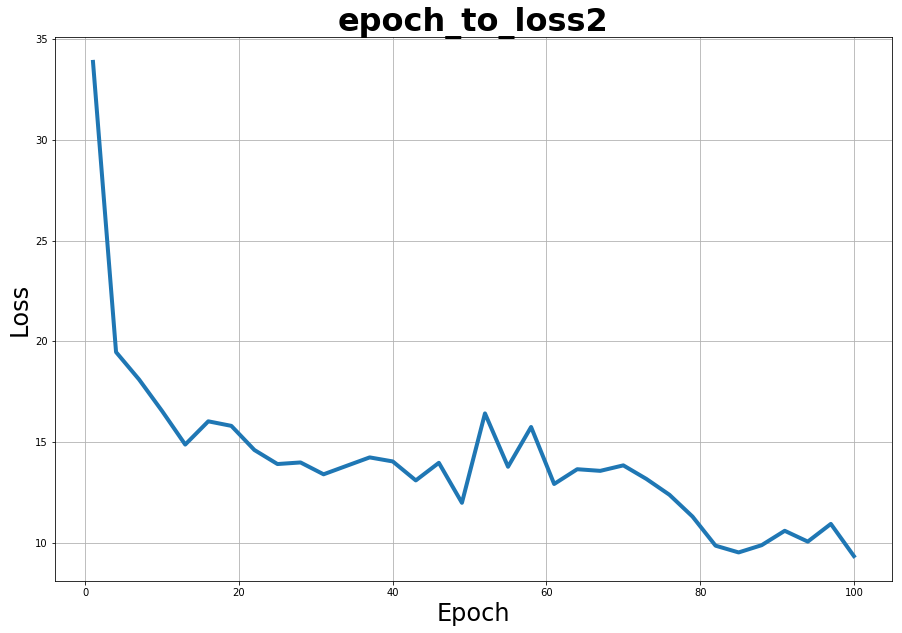

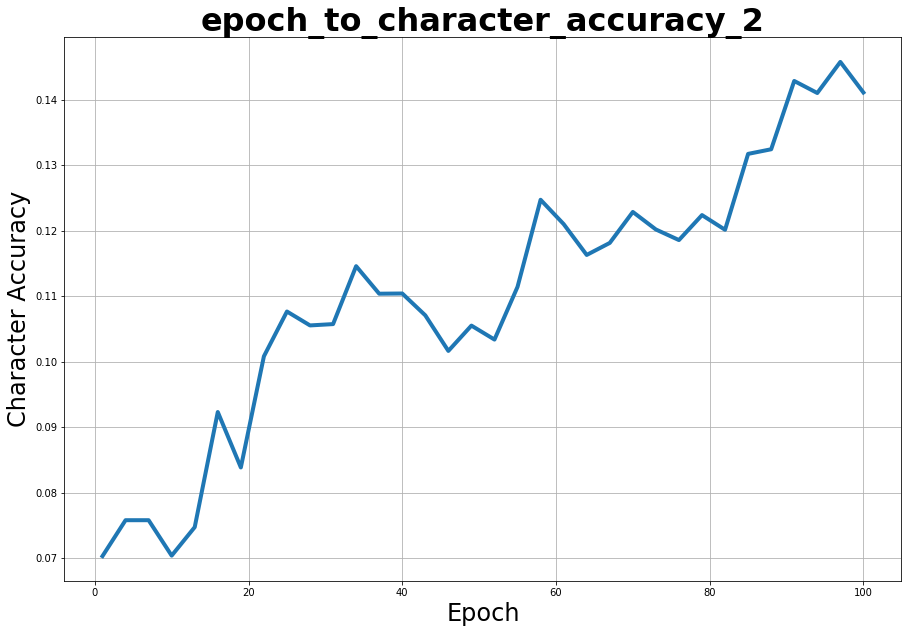

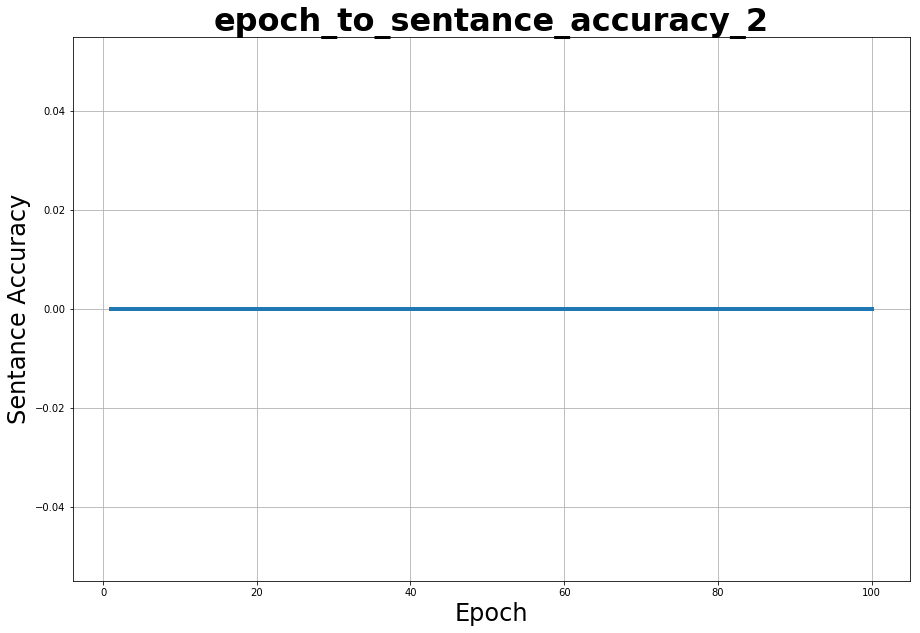

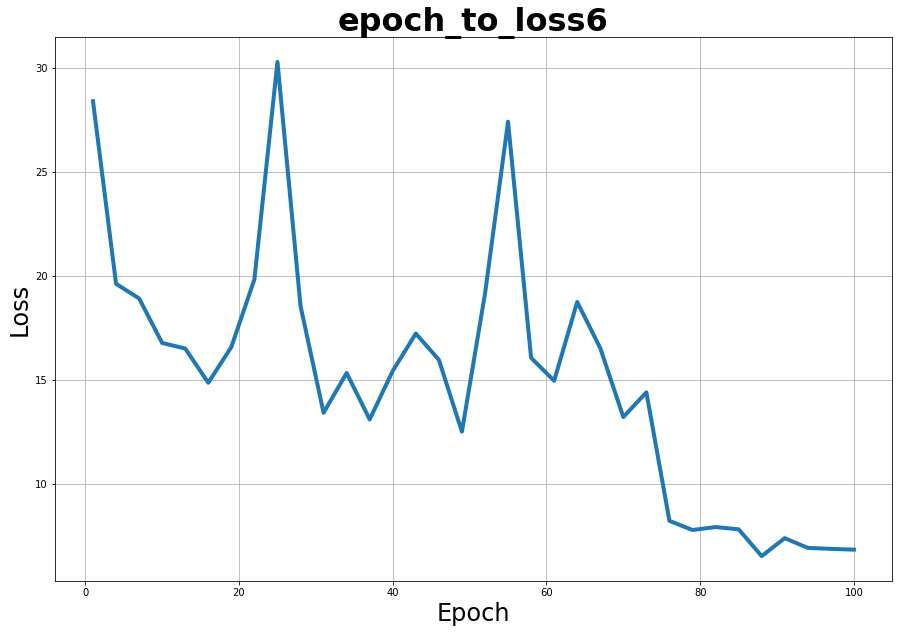

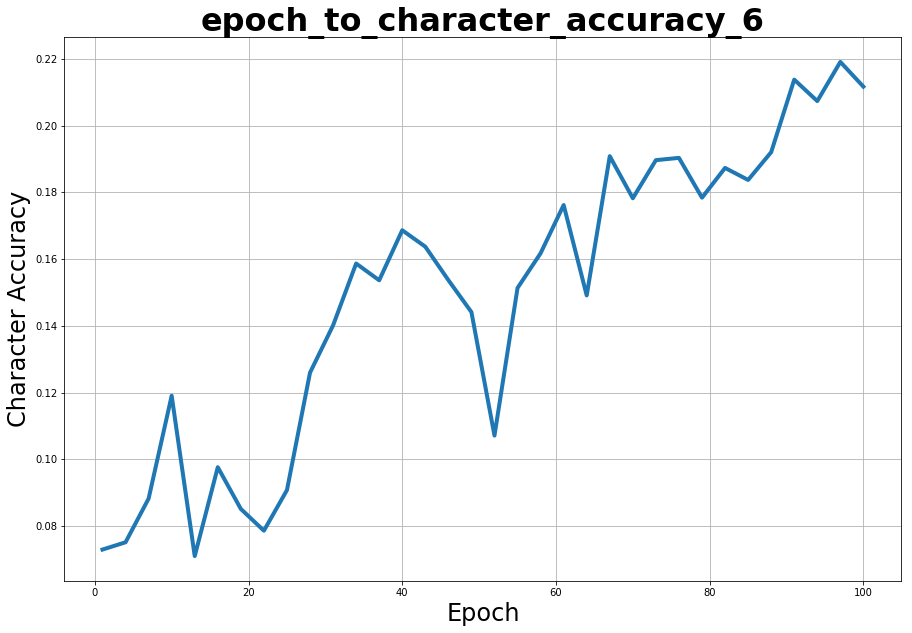

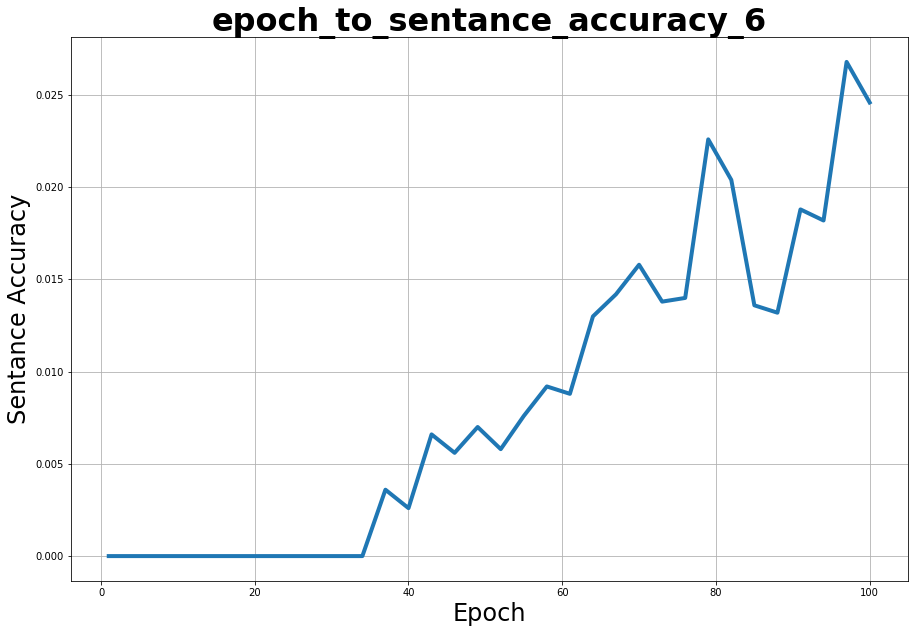

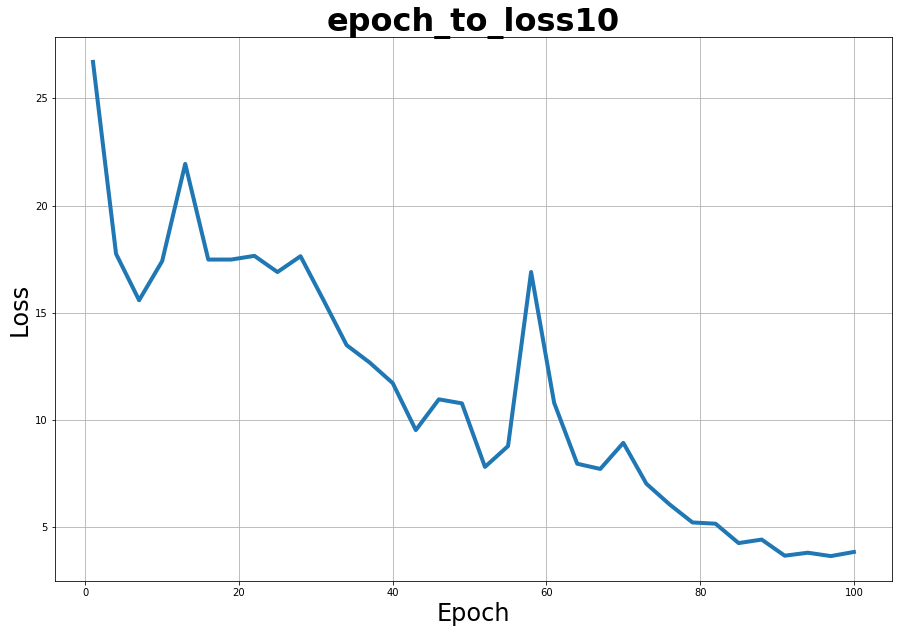

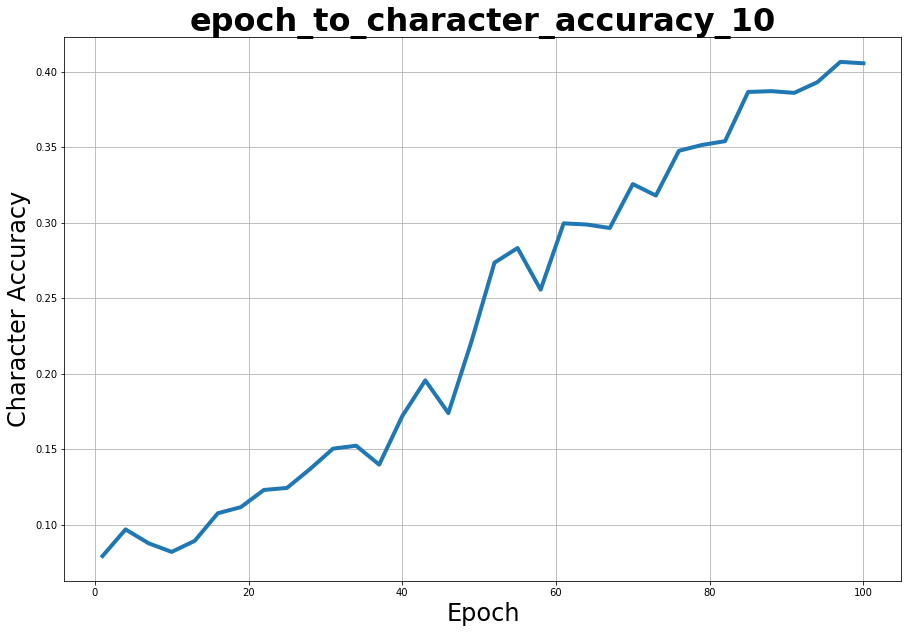

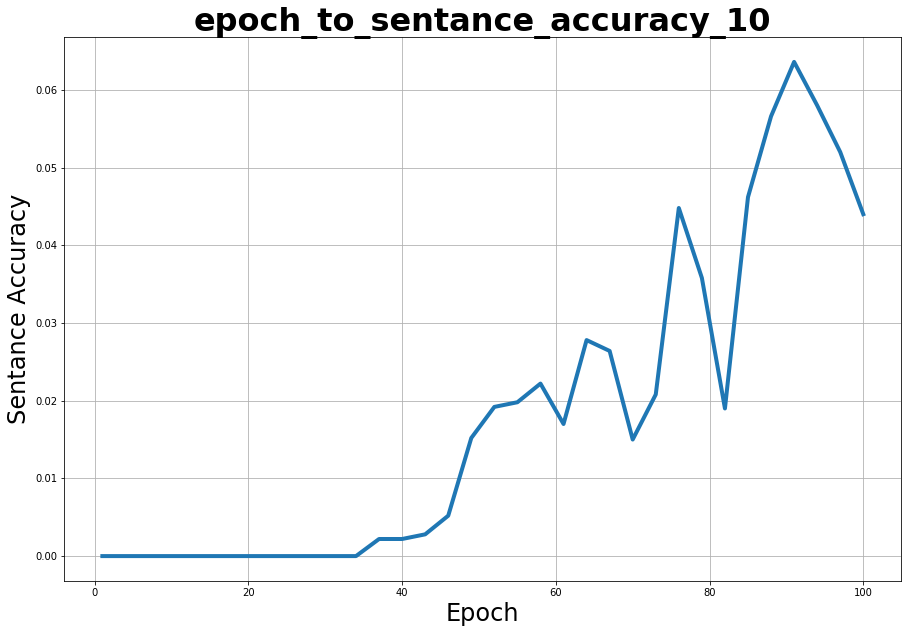

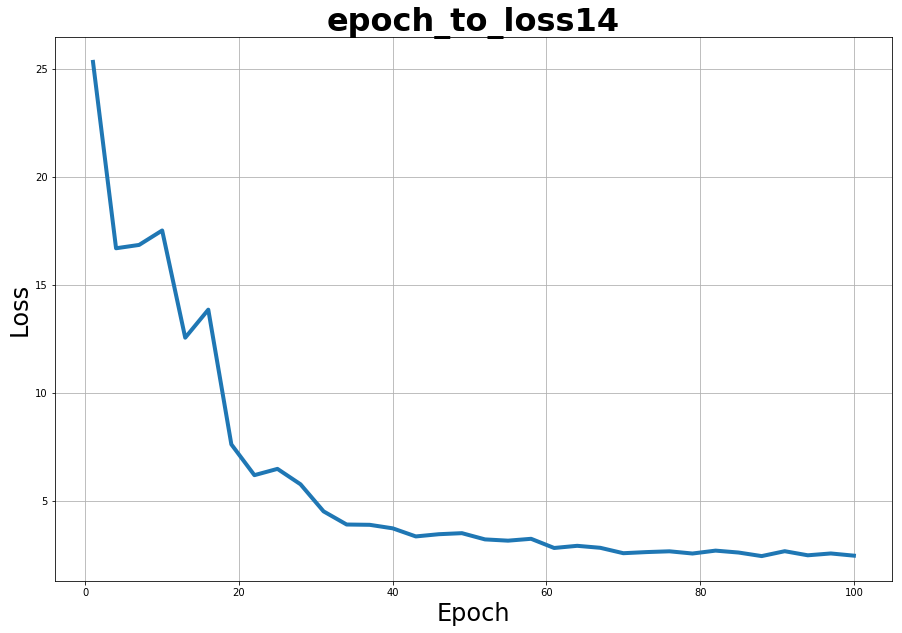

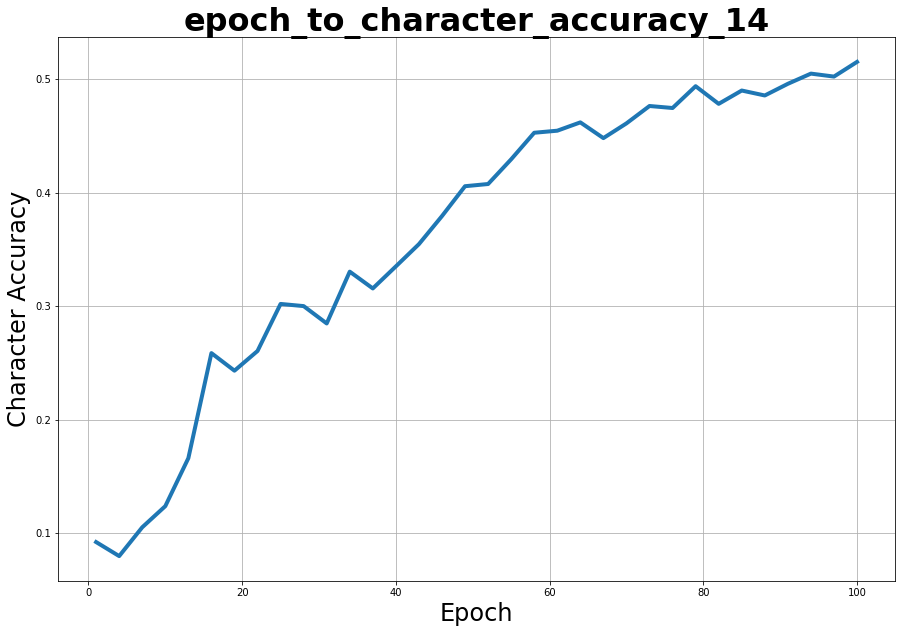

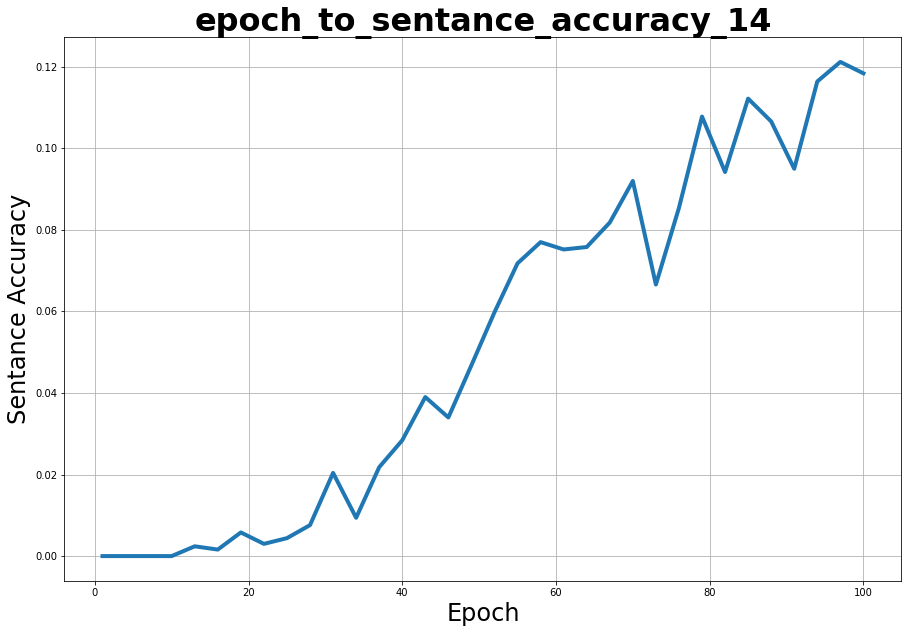

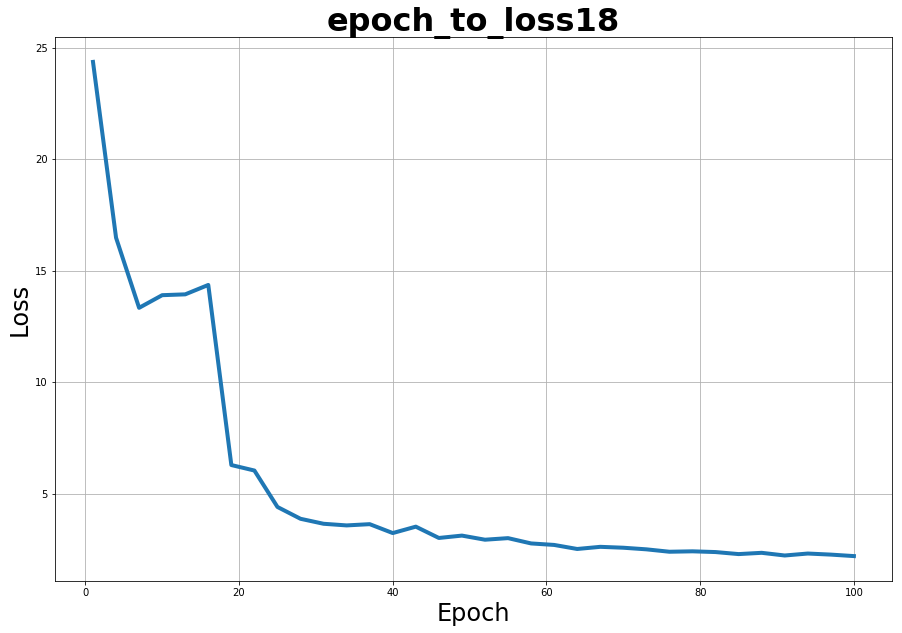

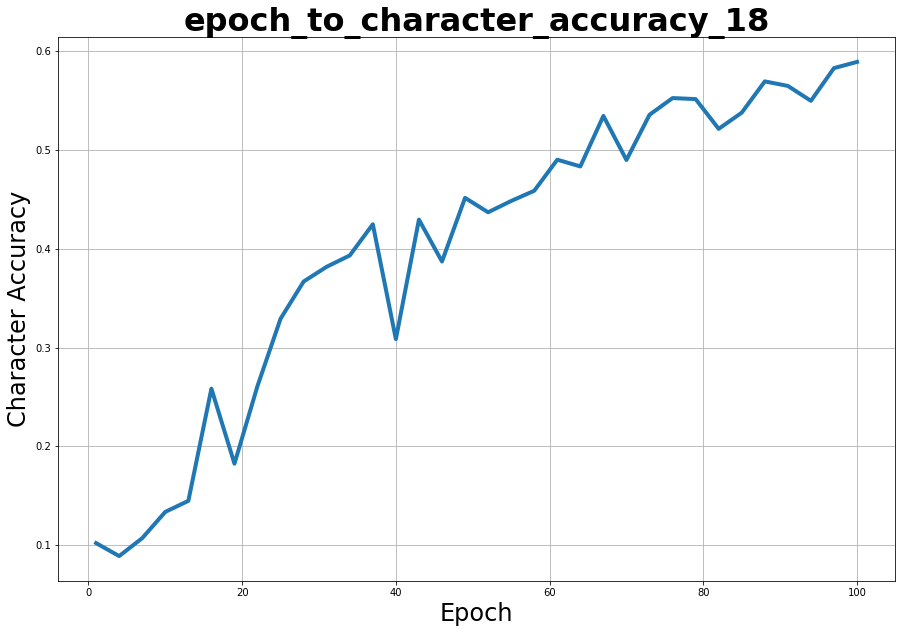

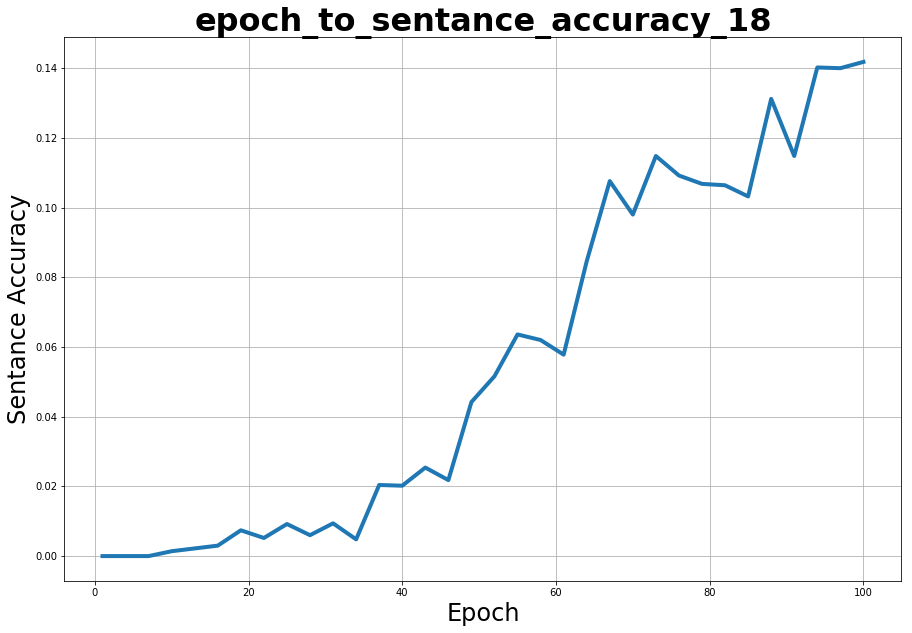

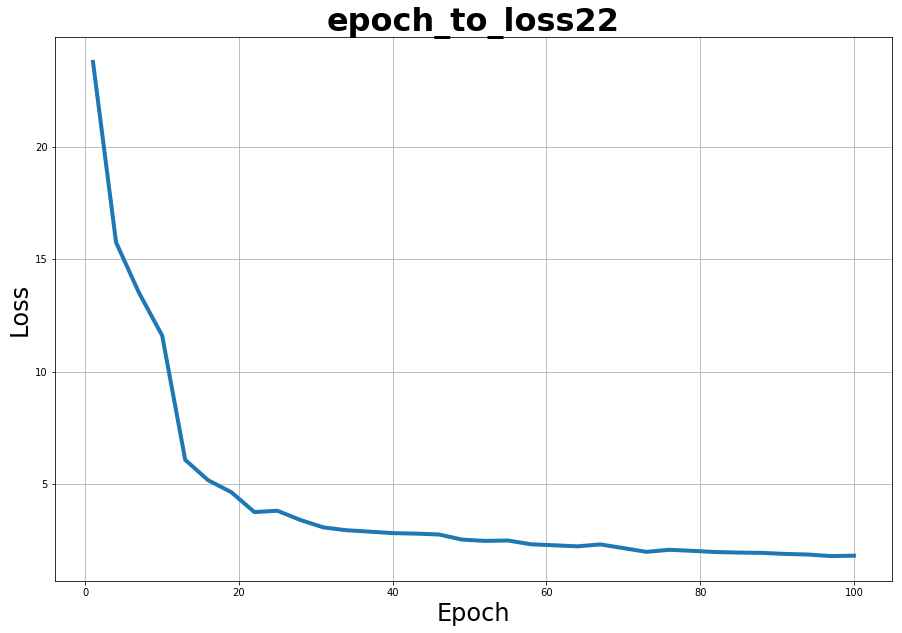

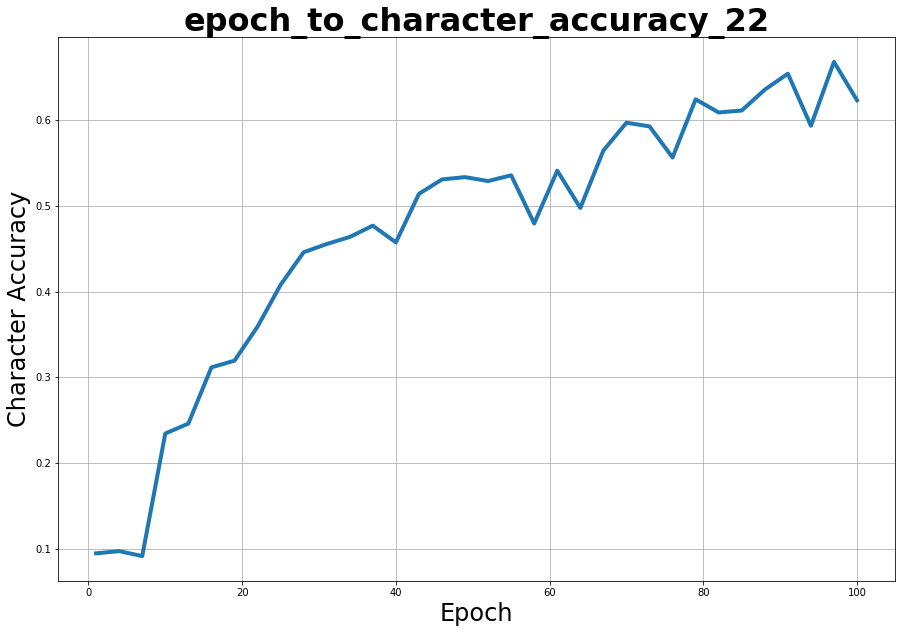

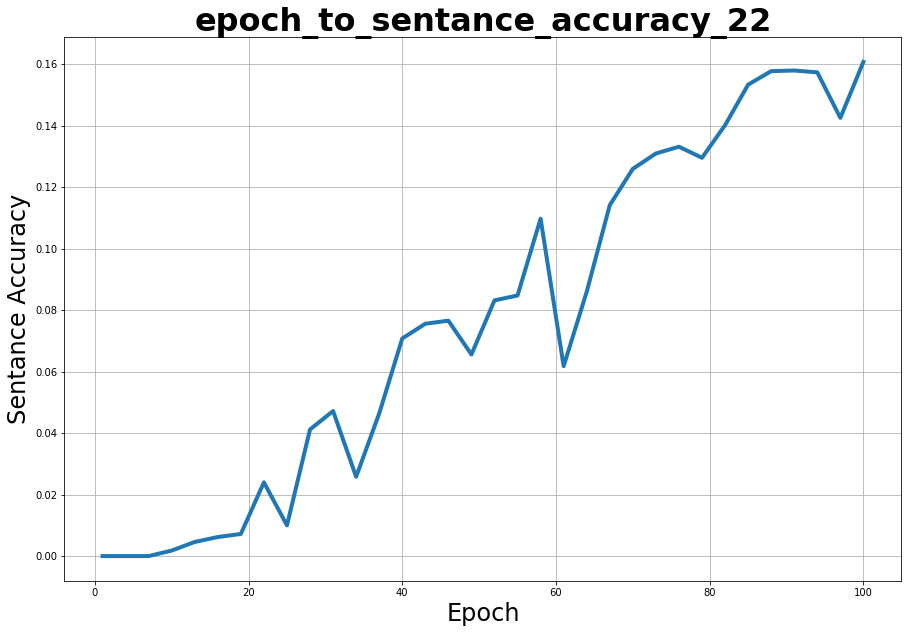

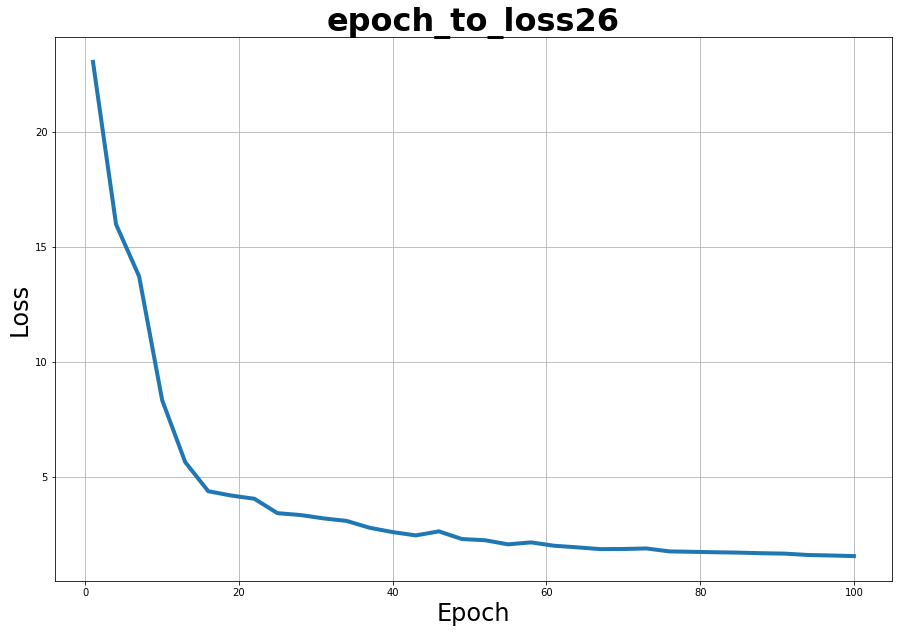

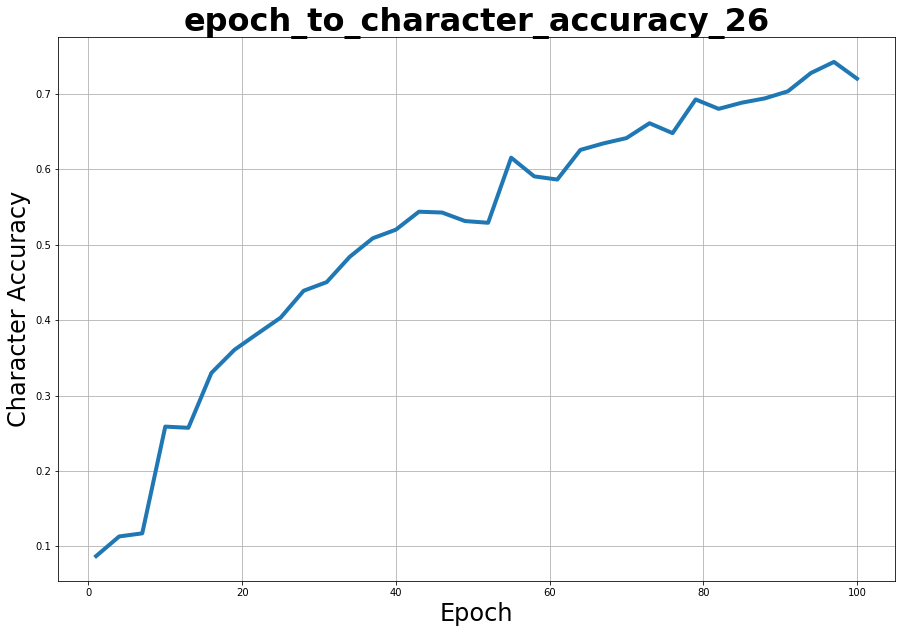

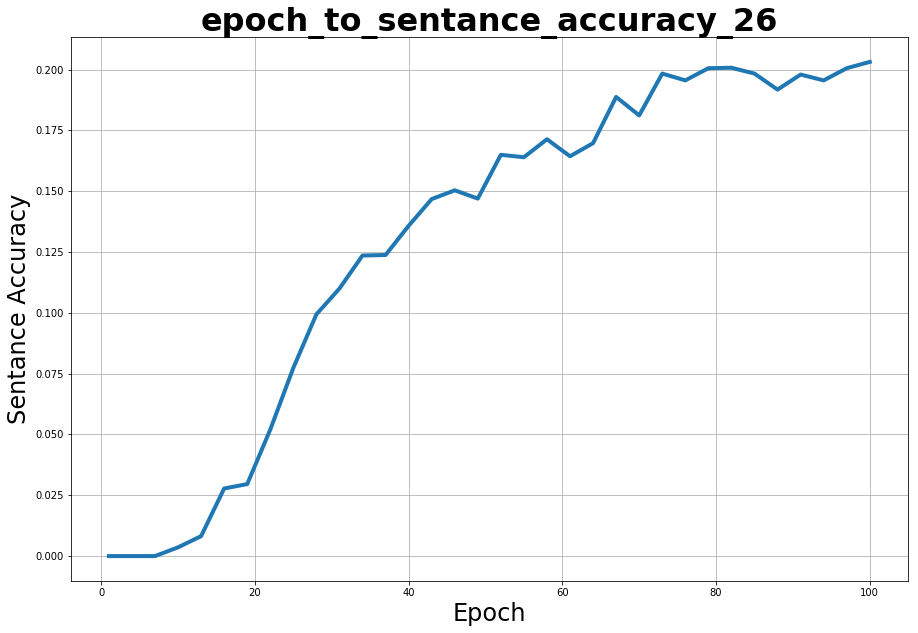

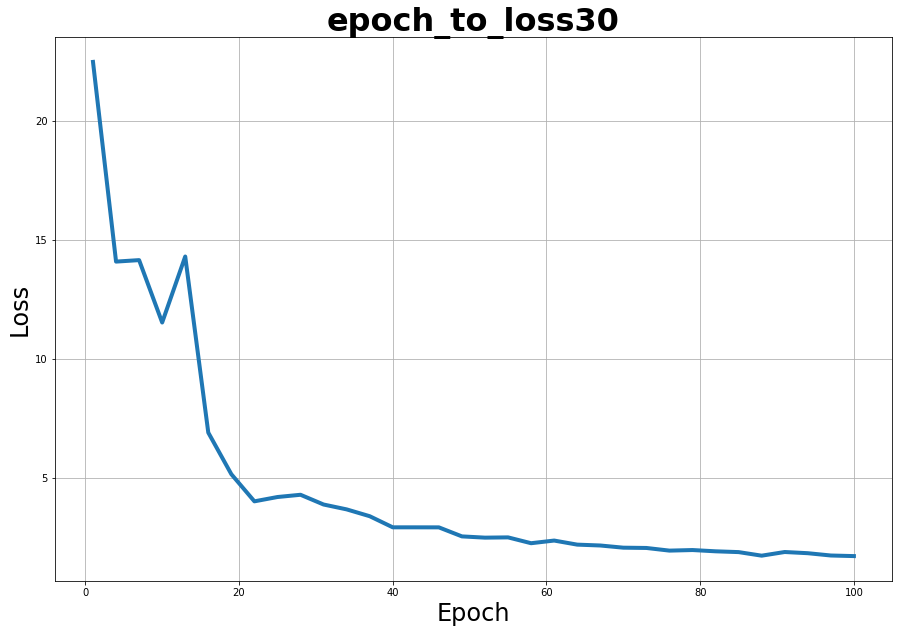

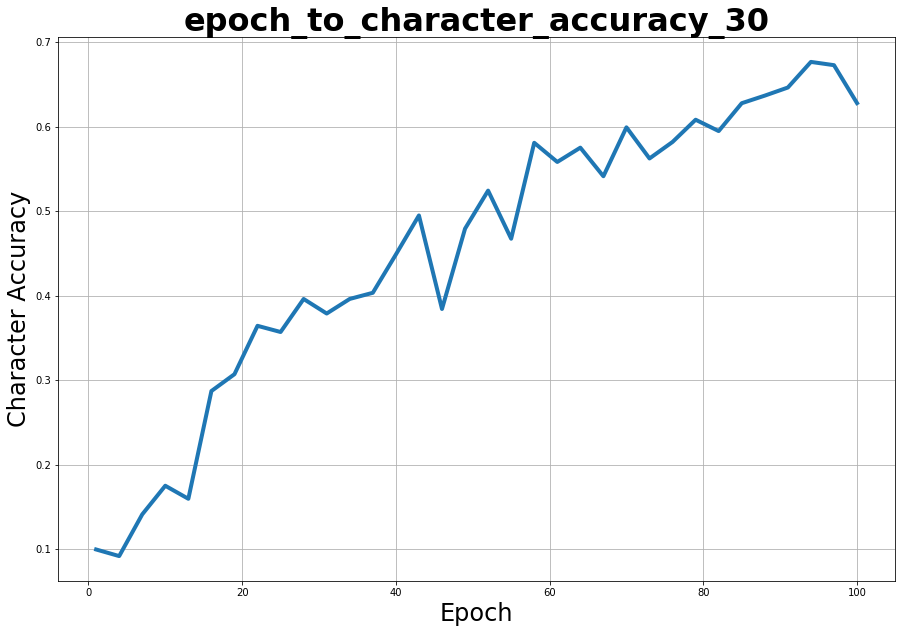

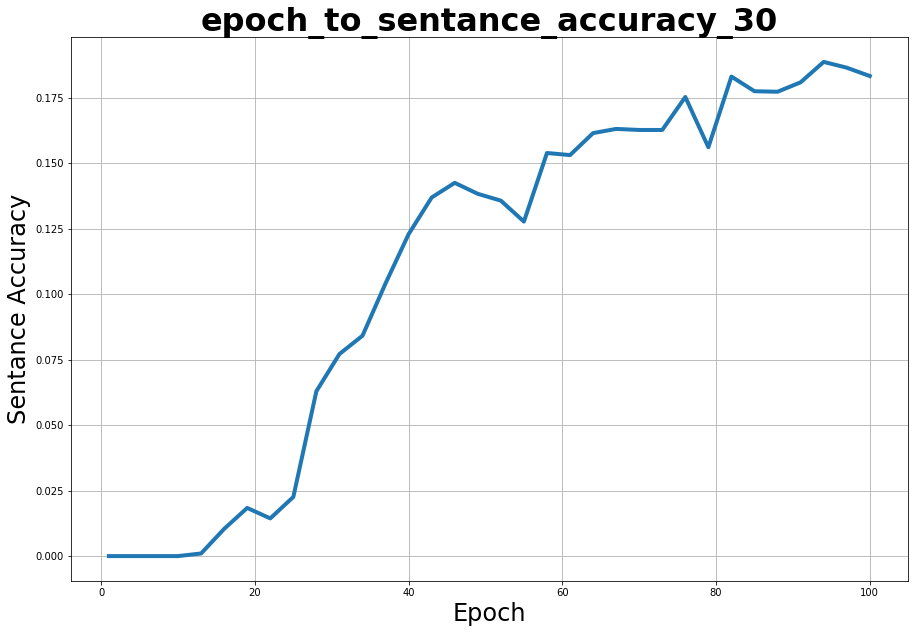

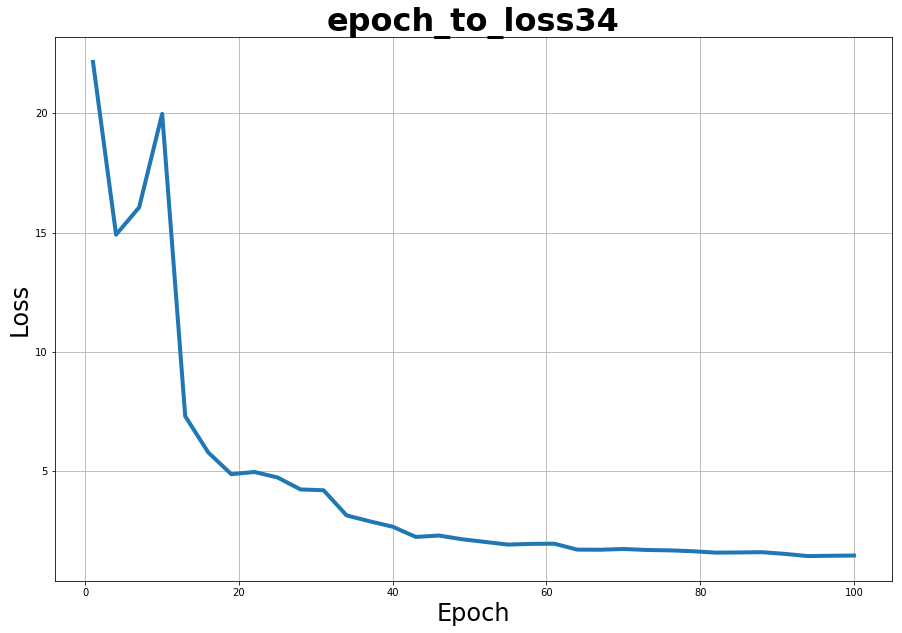

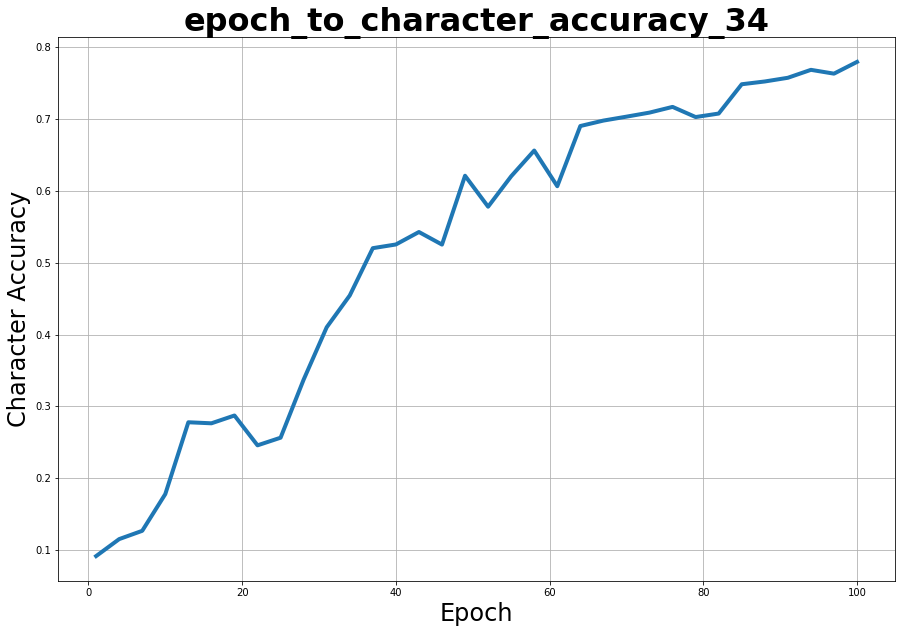

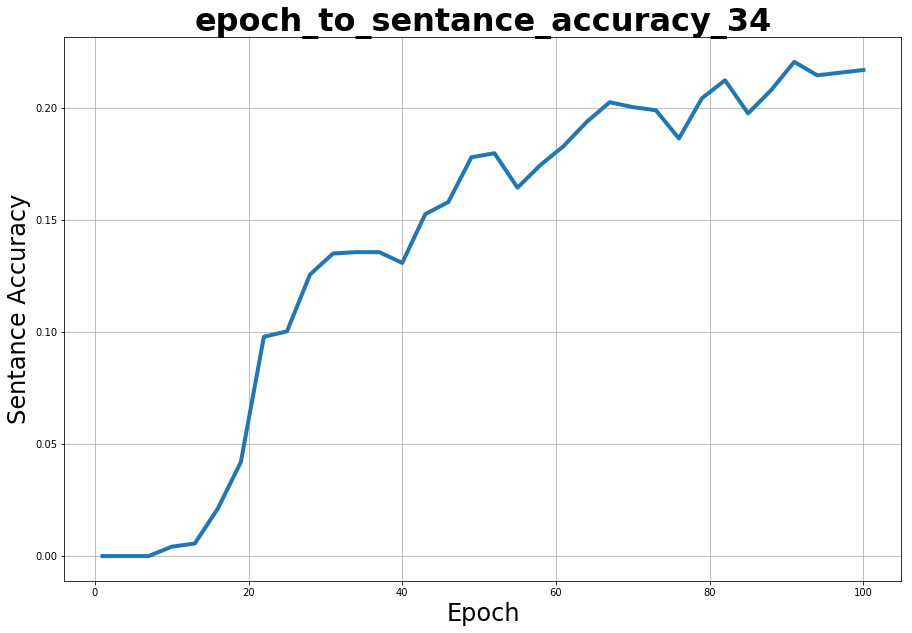

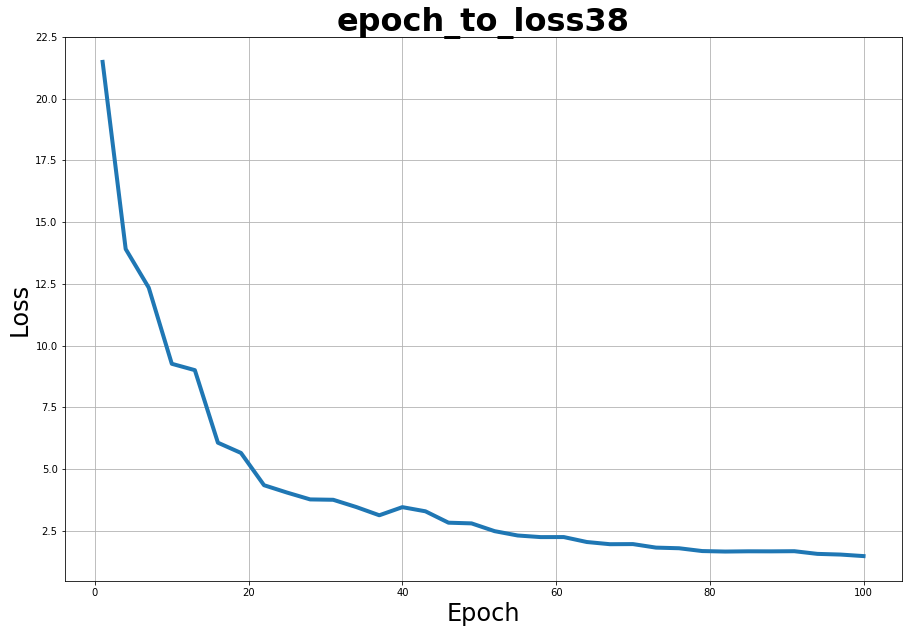

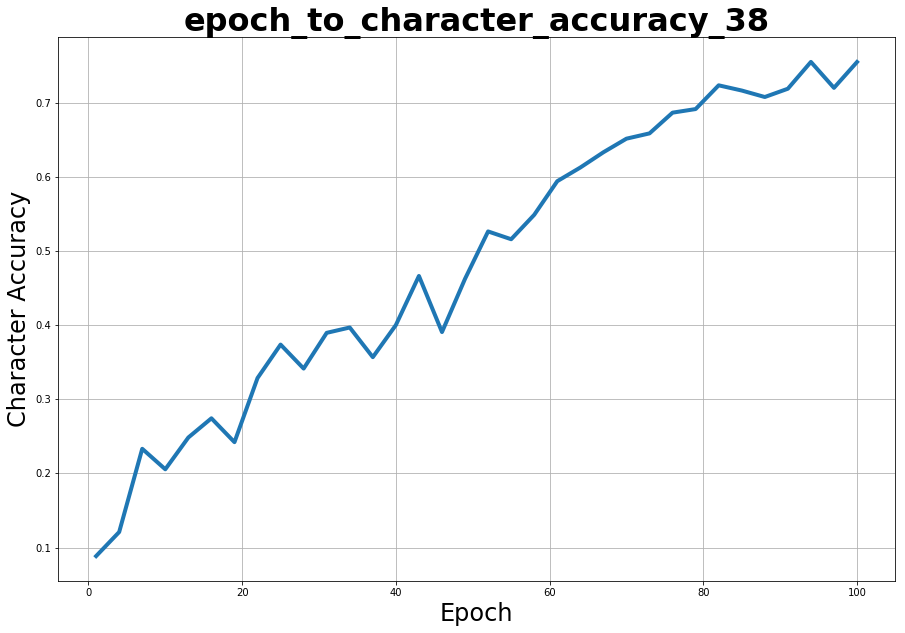

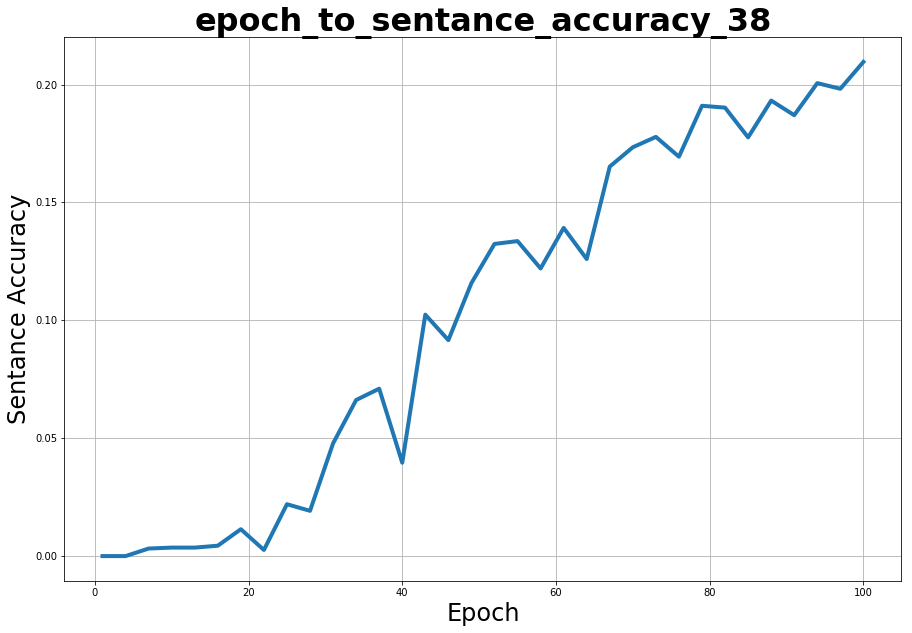

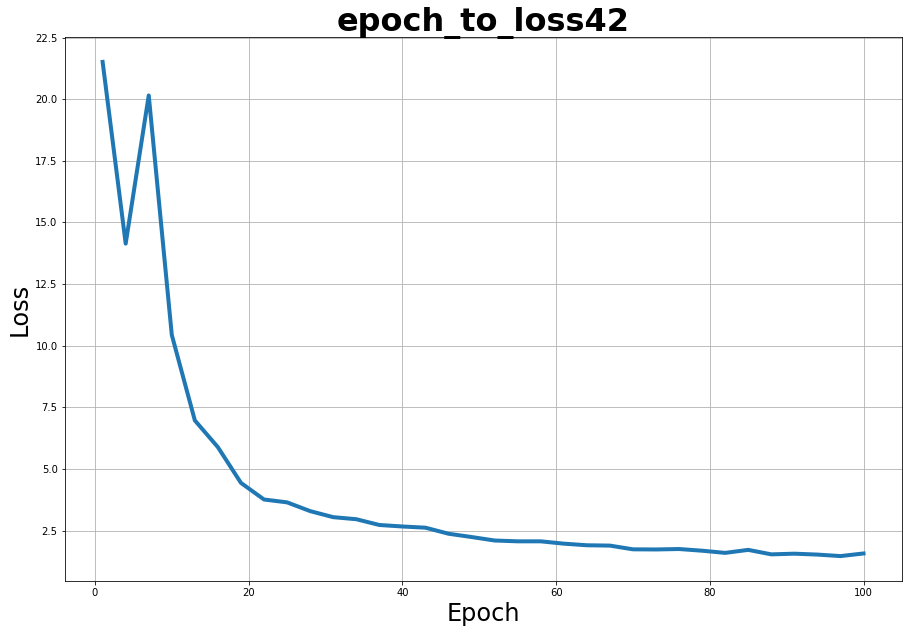

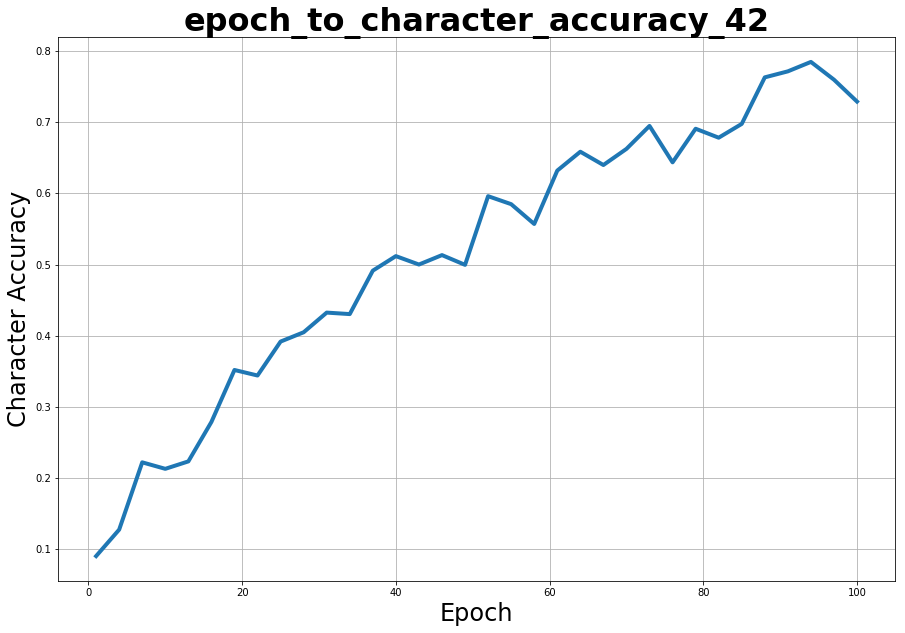

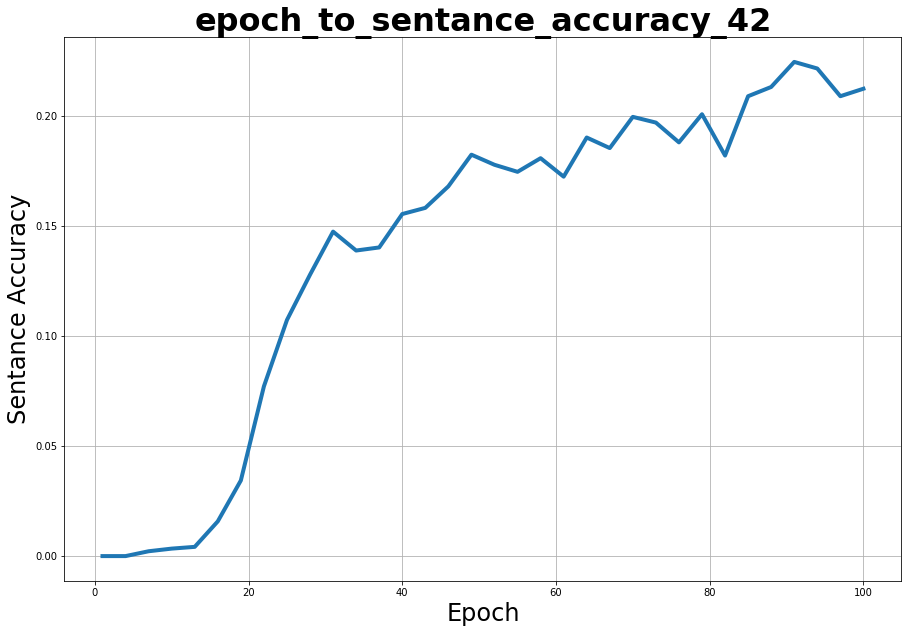

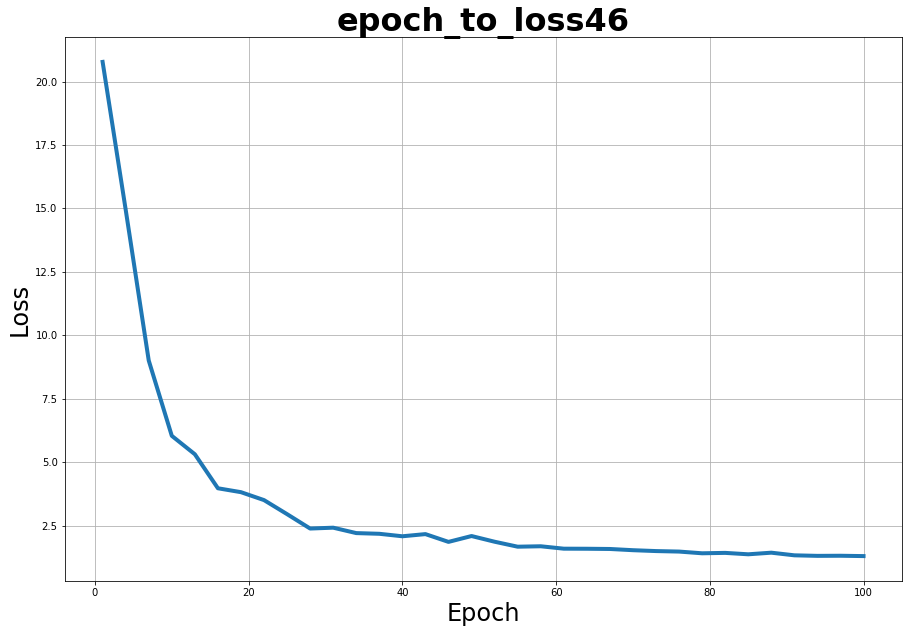

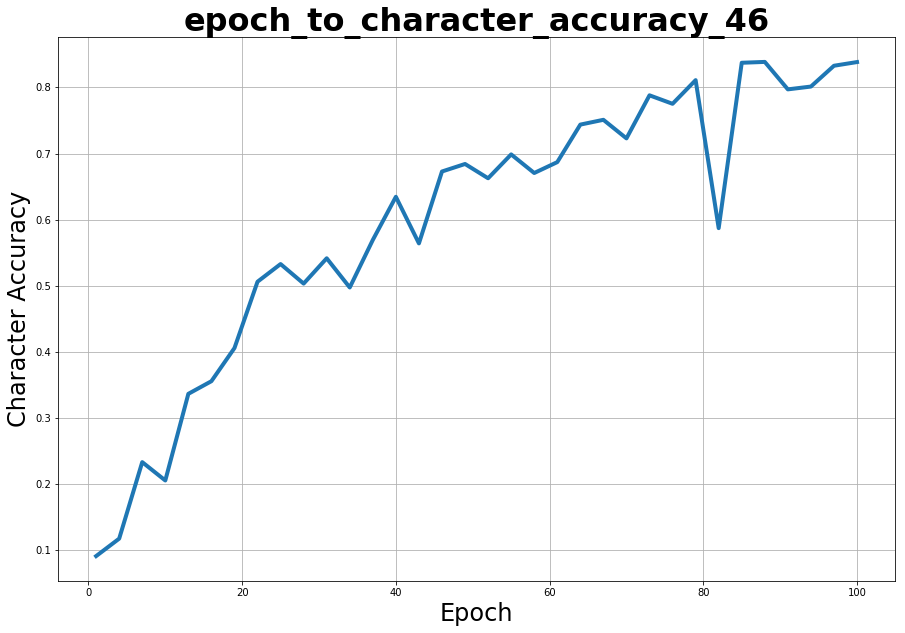

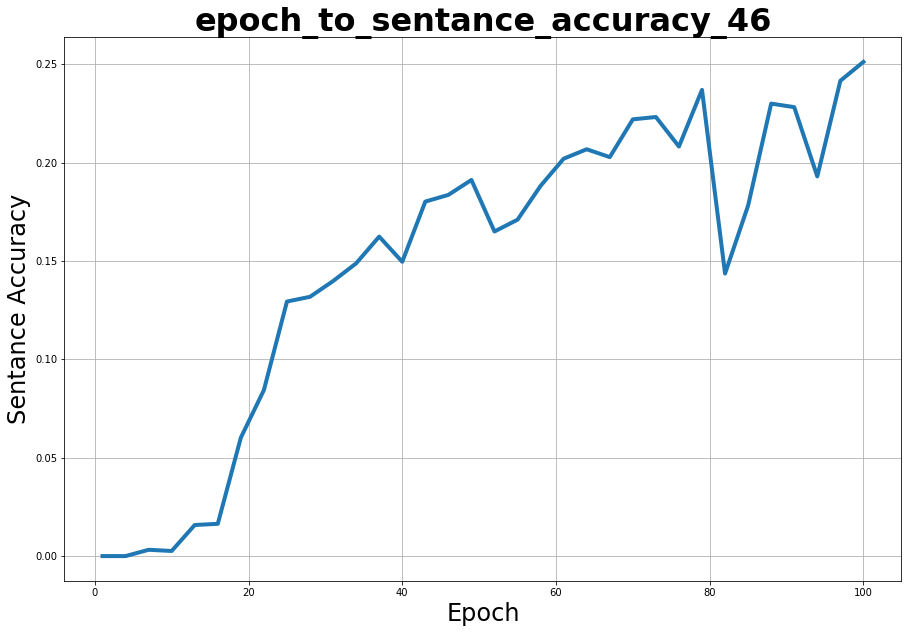

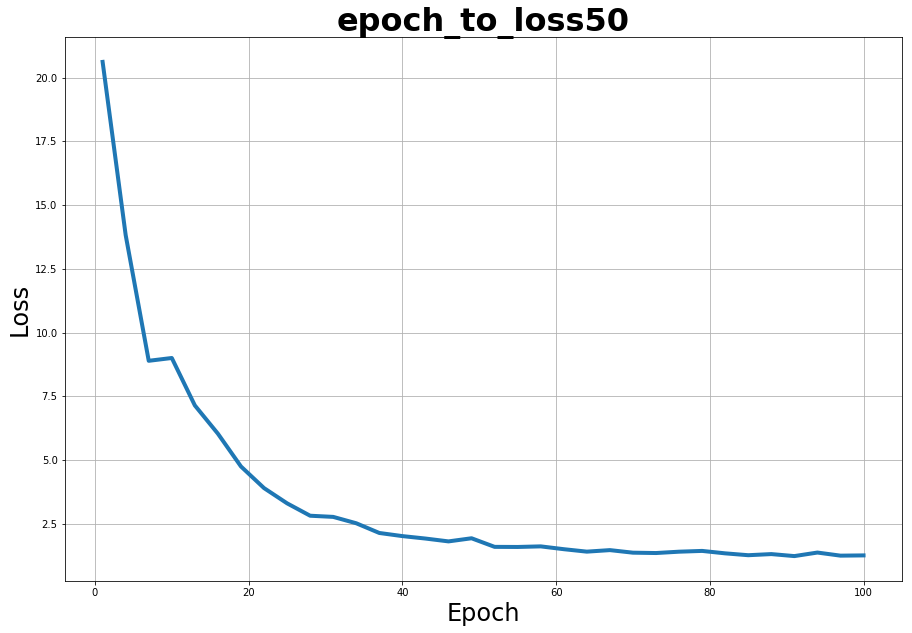

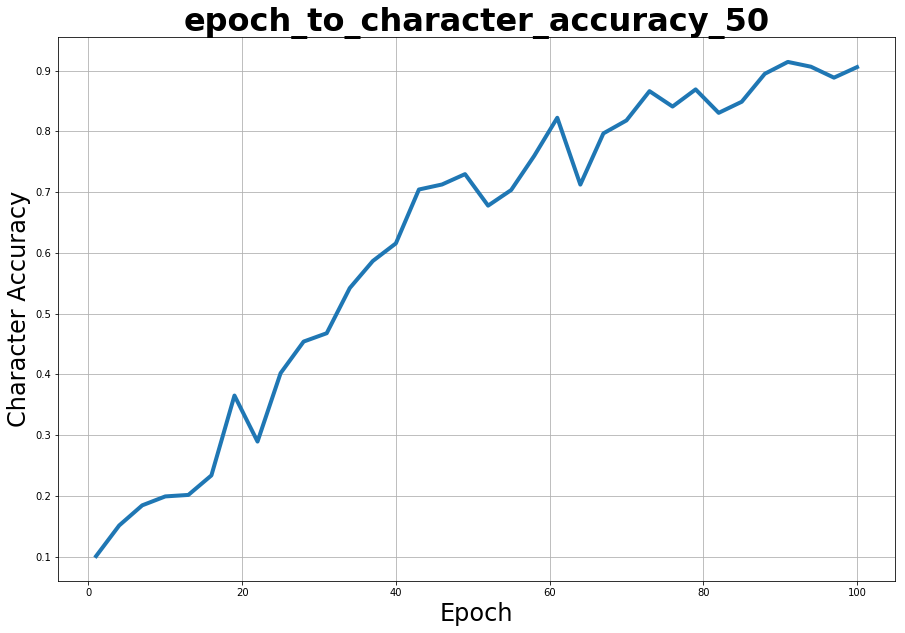

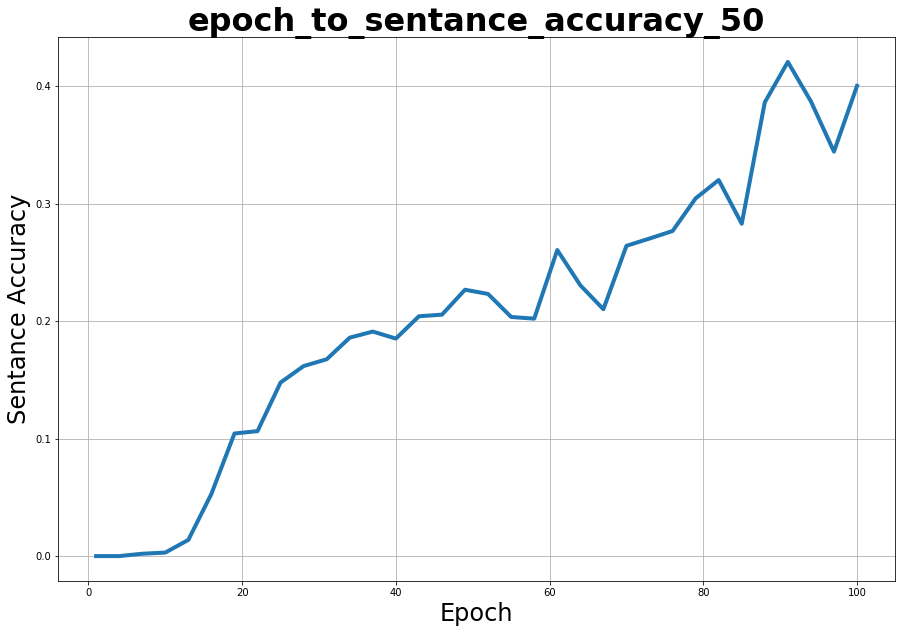

In [7]:
for i in hidden_sizes:
    hidden_size = i
    print("hidden size is : %d" % hidden_size)
    seq2seq = None
    encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                         bidirectional=bidirectional, variable_lengths=True)
    decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                         dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                         eos_id=tgt.eos_id, sos_id=tgt.sos_id)
    seq2seq = Seq2seq(encoder, decoder)
    if torch.cuda.is_available():
        seq2seq.cuda()

    for param in seq2seq.parameters():
        param.data.uniform_(-0.08, 0.08)

    # train
    t = SupervisedTrainer(loss=loss, batch_size=32,
                          checkpoint_every=50,
                          print_every=100,
                          hidden_size=hidden_size,
                          path="hidden_size_to_error_rate/rand_Hidden_" + str(hidden_size))

    seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                                num_epochs=100, dev_data=dev,
                                                                                optimizer=optimizer,
                                                                                teacher_forcing_ratio=0.5)
    
    best_character_accuracy = 0
    best_sentance_accuracy = 0
    for i,j in zip(character_accuracy_list, sentance_accuracy_list):
        if best_character_accuracy < i:
            best_character_accuracy = i
        if best_sentance_accuracy < j:
            best_sentance_accuracy = j

    character_error_rate.append(1 - best_character_accuracy)
    sentance_error_rate.append(1 - best_sentance_accuracy)

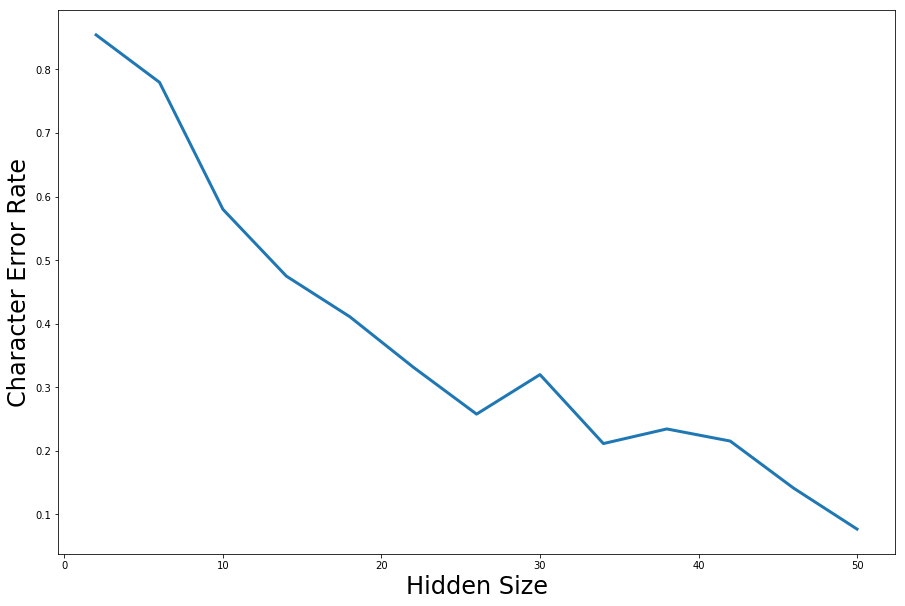

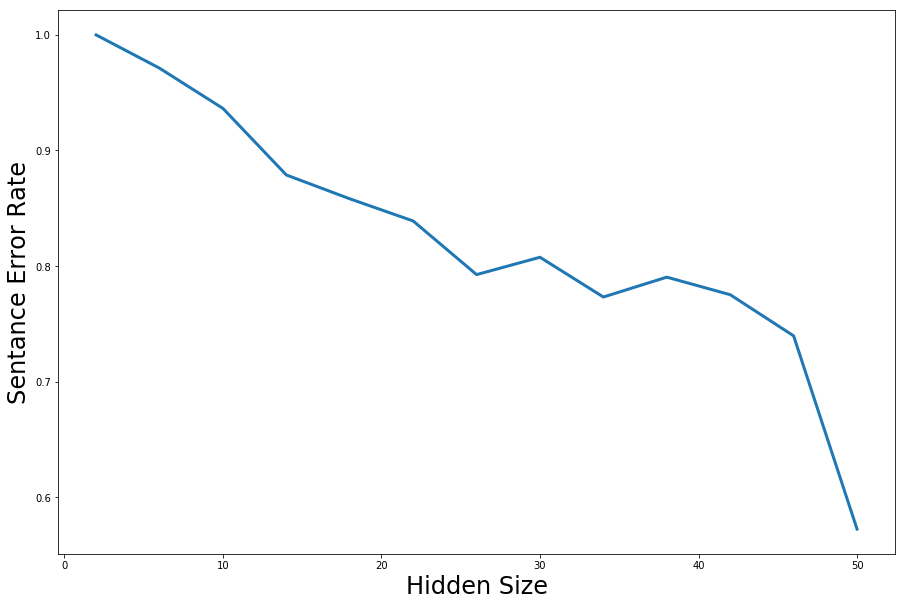

In [10]:
plt.figure(figsize=(15,10))
plt.plot(hidden_sizes, character_error_rate, LineWidth=3)
plt.xlabel('Hidden Size', fontsize=24)
plt.ylabel('Character Error Rate', fontsize=24)
plt.savefig('log/plot/hidden_size_to_error_rate/rand_hidden_size_to_character_error_rate.png')

plt.figure(figsize=(15,10))
plt.plot(hidden_sizes, sentance_error_rate, LineWidth=3)
plt.xlabel('Hidden Size', fontsize=24)
plt.ylabel('Sentance Error Rate', fontsize=24)
plt.savefig('log/plot/hidden_size_to_error_rate/rand_hidden_size_to_sentance_error_rate.png')

In [11]:
print(character_error_rate)
print(sentance_error_rate)

[0.8542433278025067, 0.779620026082644, 0.5798337078376509, 0.4747837161032775, 0.41095164914557913, 0.3316475536806529, 0.2576946861204822, 0.3198583210369381, 0.21136125686506213, 0.23437643500462257, 0.21531651227292492, 0.1412289456121768, 0.07682440747702457]
[1, 0.9712, 0.9364, 0.8788, 0.8582, 0.839, 0.7926, 0.8076, 0.7732, 0.7904, 0.7752, 0.7396, 0.5724]
